### Статистический анализ поведения абонентов двух тарифных планов 

Клиентам мобильного оператора предлагают два тарифных плана «Смарт» и «Ультра». Необходимо сделать анализ потребления услуг и понять какой тариф оператору выгоднее продвигать в рекламной кампании.

В наличии:
 - Таблица `users` (информация о пользователях)
 
 - Таблица `calls` (информация о звонках)
    
 - Таблица `messages` (информация о сообщениях)
   
 - Таблица `internet` (информация об интернет-сессиях)
    
 - Таблица `tariffs` (информация о тарифах)


In [3]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sea
from matplotlib import pyplot as plt
import statistics as stat
import math 
from scipy import stats as st

### Загрузка данных

In [4]:
#Загружаем данные
try:
    calls, internet, messages, tariffs, users= (
        pd.read_csv('/datasets/calls.csv'), # путь к файлам
        pd.read_csv('/datasets/internet.csv',index_col=0), 
        pd.read_csv('/datasets/messages.csv'),
        pd.read_csv('/datasets/tariffs.csv'),
        pd.read_csv('/datasets/users.csv')
                            )
except:
    try:
        calls, internet, messages, tariffs, users = (
            pd.read_csv('calls.csv'), # локальный путь к файлу
            pd.read_csv('internet.csv', index_col=0), 
            pd.read_csv('messages.csv'),
            pd.read_csv('tariffs.csv'),
            pd.read_csv('users.csv')
                            )
    except:
        calls, internet, messages, tariffs, users = (
            pd.read_csv('https://link'), # интернет ссылка на файл
            pd.read_csv('https://link',index_col=0), 
            pd.read_csv('https://link'),
            pd.read_csv('https://link'),
            pd.read_csv('https://link') 
                            )           

In [5]:
#Отформатируем вывод для численных значений типа float
pd.set_option('display.float_format', '{:,.2f}'.format) 

In [6]:
#Посмотрим информацию о таблице звонков
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
#Посмотрим информацию о таблице звонков
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [8]:
#Посмотрим информацию о таблице интернет
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [9]:
#Посмотрим информацию о таблице интернет
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,"1,052.81",2018-09-07,1000
2,1000_2,"1,197.26",2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [10]:
#Посмотрим информацию о таблице сообщений
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
#Посмотрим информацию о таблице сообщений
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [12]:
#Посмотрим информацию о таблице тарифов
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [13]:
#Посмотрим информацию о таблице тарифов
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [14]:
#Посмотрим информацию о таблице пользователей
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [15]:
#Посмотрим информацию о таблице пользователей
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [16]:
#Функция выводит информацию по колонке - название, уникальные значения, количество нулей, распределение значений
def column_describe(data, column):
    print('Column:',column)
    print()
    print('Unique elements: ',data[column].unique())
    print()
    print('Zeroes count:',data[data[column] ==0][column].count())
    display(data[data[column] != data[column].isna()][[column]].describe([.001,.1,.95]).T)
    print('-'*80)
    print()

In [17]:
#Запустим функция для таблицы calls
for col in calls.columns:
    column_describe(calls, col)

Column: id

Unique elements:  ['1000_0' '1000_1' '1000_2' ... '1499_217' '1499_218' '1499_219']

Zeroes count: 0


,count,unique,top,freq
id,202607,202607,1093_253,1


--------------------------------------------------------------------------------

Column: call_date

Unique elements:  ['2018-07-25' '2018-08-17' '2018-06-11' '2018-09-21' '2018-12-15'
 '2018-11-02' '2018-10-18' '2018-08-22' '2018-09-15' '2018-08-15'
 '2018-05-28' '2018-07-05' '2018-09-29' '2018-12-11' '2018-07-27'
 '2018-08-11' '2018-08-02' '2018-06-15' '2018-12-04' '2018-08-20'
 '2018-09-25' '2018-07-21' '2018-08-27' '2018-08-25' '2018-12-12'
 '2018-07-19' '2018-11-14' '2018-12-26' '2018-12-02' '2018-10-08'
 '2018-09-23' '2018-10-09' '2018-05-25' '2018-06-13' '2018-10-25'
 '2018-12-29' '2018-07-12' '2018-11-20' '2018-06-05' '2018-10-13'
 '2018-06-26' '2018-07-14' '2018-07-20' '2018-12-01' '2018-06-17'
 '2018-10-24' '2018-11-26' '2018-09-19' '2018-05-30' '2018-12-21'
 '2018-12-23' '2018-07-03' '2018-10-04' '2018-09-16' '2018-11-21'
 '2018-10-28' '2018-08-29' '2018-08-13' '2018-07-18' '2018-06-03'
 '2018-09-03' '2018-08-14' '2018-11-01' '2018-05-26' '2018-11-23'
 '2018-09-30' '2018-11-

,count,unique,top,freq
call_date,202607,365,2018-12-31,1435


--------------------------------------------------------------------------------

Column: duration

Unique elements:  [ 0.    2.85 13.8  ... 24.36 24.5  26.9 ]

Zeroes count: 39613


,count,mean,std,min,0.1%,10%,50%,95%,max
duration,"162,994.00",8.40,5.35,0.01,0.02,1.87,7.74,18.21,38.00


--------------------------------------------------------------------------------

Column: user_id

Unique elements:  [1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1092 1093 1094 1095 1096 1097 1098
 1099 1100 1101 1102 1103 1104 1105 1107 1108 1109 1110 1111 1112 1113
 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126 1127
 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140 1141 1142
 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154 1155 1156
 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167 1168 1169 1170
 1171 1172 1173 1174 1175 1176 

,count,mean,std,min,0.1%,10%,50%,95%,max
user_id,"202,607.00","1,253.94",144.72,"1,000.00","1,000.00","1,054.00","1,260.00","1,472.00","1,499.00"


--------------------------------------------------------------------------------



In [18]:
#Запустим функция для таблицы internet
for col in internet.columns:
    column_describe(internet, col)

Column: id

Unique elements:  ['1000_0' '1000_1' '1000_2' ... '1499_154' '1499_155' '1499_156']

Zeroes count: 0


,count,unique,top,freq
id,149396,149396,1093_253,1


--------------------------------------------------------------------------------

Column: mb_used

Unique elements:  [ 112.95 1052.81 1197.26 ...  460.75  247.59   23.72]

Zeroes count: 19598


,count,mean,std,min,0.1%,10%,50%,95%,max
mb_used,"129,798.00",426.09,255.60,0.03,1.26,106.24,400.54,887.40,"1,724.83"


--------------------------------------------------------------------------------

Column: session_date

Unique elements:  ['2018-11-25' '2018-09-07' '2018-06-25' '2018-08-22' '2018-09-24'
 '2018-10-02' '2018-07-11' '2018-10-08' '2018-09-03' '2018-09-27'
 '2018-08-28' '2018-06-20' '2018-08-09' '2018-08-11' '2018-07-21'
 '2018-06-09' '2018-06-03' '2018-11-01' '2018-11-28' '2018-08-20'
 '2018-12-06' '2018-07-02' '2018-10-19' '2018-10-30' '2018-06-17'
 '2018-11-06' '2018-09-14' '2018-11-15' '2018-08-26' '2018-10-15'
 '2018-11-27' '2018-10-17' '2018-10-07' '2018-08-05' '2018-07-06'
 '2018-10-03' '2018-11-02' '2018-06-30' '2018-11-17' '2018-06-06'
 '2018-11-20' '2018-05-31' '2018-10-29' '2018-12-10' '2018-07-04'
 '2018-12-28' '2018-05-28' '2018-09-15' '2018-09-09' '2018-09-17'
 '2018-09-01' '2018-11-03' '2018-11-04' '2018-06-16' '2018-12-07'
 '2018-08-25' '2018-06-15' '2018-06-26' '2018-10-06' '2018-12-01'
 '2018-10-14' '2018-06-07' '2018-12-15' '2018-10-04' '2018-08-13'
 '2018-07-10' '2018-

,count,unique,top,freq
session_date,149396,365,2018-12-31,1057


--------------------------------------------------------------------------------

Column: user_id

Unique elements:  [1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140
 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154
 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167 1168
 1169 1170 1171 1172 1173 1174 

,count,mean,std,min,0.1%,10%,50%,95%,max
user_id,"149,396.00","1,252.10",144.05,"1,000.00","1,000.00","1,053.00","1,251.00","1,476.00","1,499.00"


--------------------------------------------------------------------------------



In [19]:
#Запустим функция для таблицы messages

for col in messages.columns:
    column_describe(messages, col)

Column: id

Unique elements:  ['1000_0' '1000_1' '1000_2' ... '1499_181' '1499_182' '1499_183']

Zeroes count: 0


,count,unique,top,freq
id,123036,123036,1093_253,1


--------------------------------------------------------------------------------

Column: message_date

Unique elements:  ['2018-06-27' '2018-10-08' '2018-08-04' '2018-06-16' '2018-12-05'
 '2018-06-20' '2018-11-19' '2018-10-29' '2018-06-25' '2018-12-18'
 '2018-05-30' '2018-07-06' '2018-08-20' '2018-10-30' '2018-09-14'
 '2018-08-28' '2018-06-29' '2018-07-07' '2018-05-29' '2018-05-28'
 '2018-08-15' '2018-07-29' '2018-12-07' '2018-12-25' '2018-10-31'
 '2018-07-30' '2018-11-05' '2018-12-15' '2018-12-04' '2018-06-30'
 '2018-12-22' '2018-10-02' '2018-08-29' '2018-09-09' '2018-07-19'
 '2018-09-04' '2018-07-15' '2018-10-25' '2018-12-08' '2018-06-01'
 '2018-06-12' '2018-12-21' '2018-10-07' '2018-08-30' '2018-06-04'
 '2018-10-01' '2018-06-22' '2018-10-12' '2018-10-15' '2018-10-24'
 '2018-09-20' '2018-08-22' '2018-09-17' '2018-08-27' '2018-07-26'
 '2018-06-05' '2018-11-16' '2018-09-06' '2018-11-26' '2018-11-18'
 '2018-09-21' '2018-07-11' '2018-07-16' '2018-11-08' '2018-07-25'
 '2018-09-13' '2018-

,count,unique,top,freq
message_date,123036,364,2018-12-31,859


--------------------------------------------------------------------------------

Column: user_id

Unique elements:  [1000 1002 1003 1004 1005 1007 1008 1009 1011 1012 1013 1014 1015 1016
 1018 1019 1020 1021 1022 1023 1025 1026 1027 1028 1029 1030 1031 1032
 1033 1034 1035 1036 1037 1038 1039 1041 1042 1043 1044 1045 1046 1047
 1048 1050 1051 1052 1054 1055 1056 1057 1058 1059 1060 1061 1062 1064
 1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1079
 1080 1081 1082 1083 1084 1086 1087 1088 1089 1090 1091 1092 1093 1094
 1096 1097 1098 1099 1100 1102 1103 1104 1105 1106 1108 1109 1110 1111
 1112 1113 1115 1119 1121 1122 1123 1124 1125 1126 1127 1130 1131 1133
 1134 1135 1136 1137 1138 1139 1140 1141 1142 1144 1145 1146 1147 1148
 1149 1150 1151 1154 1155 1156 1158 1159 1160 1161 1163 1164 1165 1166
 1167 1168 1169 1170 1171 1172 1173 1174 1176 1178 1180 1181 1182 1183
 1184 1186 1187 1188 1189 1190 1191 1192 1193 1194 1196 1197 1198 1199
 1200 1202 1203 1205 1206 1207 

,count,mean,std,min,0.1%,10%,50%,95%,max
user_id,"123,036.00","1,256.99",143.52,"1,000.00","1,000.00","1,052.00","1,271.00","1,475.00","1,499.00"


--------------------------------------------------------------------------------



In [20]:
#Запустим функция для таблицы users

for col in users.columns:
    column_describe(users, col)

Column: user_id

Unique elements:  [1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139
 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153
 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167
 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181
 1182 1183 1184 1185 1186 1187 1188 1189 1

,count,mean,std,min,0.1%,10%,50%,95%,max
user_id,500.00,"1,249.50",144.48,"1,000.00","1,000.50","1,049.90","1,249.50","1,474.05","1,499.00"


--------------------------------------------------------------------------------

Column: age

Unique elements:  [52 41 59 23 68 67 21 65 63 24 26 44 38 36 64 58 73 71 61 72 42 56 32 62
 20 51 28 66 31 37 47 40 69 48 33 39 43 46 45 55 53 34 49 25 18 70 50 19
 54 60 29 27 74 22 30 75 57 35]

Zeroes count: 0


,count,mean,std,min,0.1%,10%,50%,95%,max
age,500.00,46.59,16.67,18.00,18.00,23.90,46.00,72.05,75.00


--------------------------------------------------------------------------------

Column: churn_date

Unique elements:  [nan '2018-10-05' '2018-12-18' '2018-11-21' '2018-10-03' '2018-10-14'
 '2018-12-09' '2018-12-11' '2018-12-26' '2018-08-31' '2018-12-03'
 '2018-12-23' '2018-11-07' '2018-12-16' '2018-12-20' '2018-11-30'
 '2018-12-21' '2018-08-17' '2018-09-02' '2018-10-04' '2018-11-13'
 '2018-11-22' '2018-10-28' '2018-11-26' '2018-11-27' '2018-11-16'
 '2018-10-27' '2018-12-30' '2018-09-27' '2018-12-25' '2018-12-14'
 '2018-12-24' '2018-09-26' '2018-10-25']

Zeroes count: 0


,count,unique,top,freq
churn_date,38,33,2018-10-14,2


--------------------------------------------------------------------------------

Column: city

Unique elements:  ['Краснодар' 'Москва' 'Стерлитамак' 'Новокузнецк' 'Набережные Челны'
 'Ульяновск' 'Челябинск' 'Пермь' 'Тюмень' 'Самара' 'Санкт-Петербург'
 'Иваново' 'Чебоксары' 'Омск' 'Уфа' 'Томск' 'Чита' 'Мурманск'
 'Петрозаводск' 'Тверь' 'Екатеринбург' 'Махачкала' 'Вологда' 'Череповец'
 'Ярославль' 'Сочи' 'Хабаровск' 'Ставрополь' 'Рязань' 'Улан-Удэ' 'Тула'
 'Саратов' 'Ростов-на-Дону' 'Казань' 'Иркутск' 'Курск' 'Калуга' 'Якутск'
 'Астрахань' 'Химки' 'Владикавказ' 'Волгоград' 'Саранск' 'Ижевск'
 'Новосибирск' 'Брянск' 'Тольятти' 'Нижний Тагил' 'Орёл' 'Белгород'
 'Воронеж' 'Волжский' 'Курган' 'Барнаул' 'Красноярск' 'Архангельск'
 'Липецк' 'Кемерово' 'Киров' 'Сургут' 'Пенза' 'Магнитогорск'
 'Нижний Новгород' 'Кострома' 'Владивосток' 'Тамбов' 'Балашиха'
 'Севастополь' 'Калининград' 'Оренбург' 'Смоленск' 'Нижневартовск'
 'Владимир' 'Новороссийск' 'Грозный' 'Подольск']

Zeroes count: 0


,count,unique,top,freq
city,500,76,Москва,99


--------------------------------------------------------------------------------

Column: first_name

Unique elements:  ['Рафаил' 'Иван' 'Евгений' 'Белла' 'Татьяна' 'Афанасий' 'Леонид' 'Юна'
 'Рустэм' 'Василиса' 'Эдуард' 'Веселина' 'Варлам' 'Борис' 'Яков' 'Рузана'
 'Марица' 'Мария' 'Матвей' 'Игнатий' 'Тала' 'Святослав' 'Людмила' 'Иулиан'
 'Владислав' 'Рустем' 'Алексей' 'Мариетта' 'Лаврентий' 'Инна' 'Лия'
 'Розалия' 'Анжелика' 'Изольда' 'Агнесса' 'Юрий' 'Михаил' 'Константин'
 'Марианна' 'Иннокентий' 'Джемма' 'Екатерина' 'Милица' 'Лола' 'Габриель'
 'Кристина' 'Павел' 'Ренальд' 'Луиза' 'Радислав' 'Динара' 'Лукий' 'Глеб'
 'Тамара' 'Александр' 'Таира' 'Роза' 'Исак' 'Юзефа' 'Ким' 'Гордей' 'Эльза'
 'Гектор' 'Андрей' 'Рафаэль' 'Фёдор' 'Харитон' 'Еремей' 'Всеволод' 'Софья'
 'Авксентий' 'Виолетта' 'Ириней' 'Гелена' 'Ксения' 'Вера' 'Вениамин'
 'Вероника' 'Даниэла' 'Алла' 'Элеонора' 'Аюна' 'Руслан' 'Онисим' 'Марта'
 'Эльвира' 'Габриэль' 'Исаак' 'Милана' 'Арнольд' 'Маргарита' 'Рашид'
 'Альберта' 'Д

,count,unique,top,freq
first_name,500,246,Радим,6


--------------------------------------------------------------------------------

Column: last_name

Unique elements:  ['Верещагин' 'Ежов' 'Абрамович' 'Белякова' 'Авдеенко' 'Горлов' 'Ермолаев'
 'Березина' 'Пономарёв' 'Блинова' 'Кононов' 'Алёшко' 'Соловьев'
 'Андреенко' 'Акинфьев' 'Алюшина' 'Сазонова' 'Аленникова' 'Золотов'
 'Круглов' 'Костина' 'Тихонов' 'Трофимова' 'Мельникова' 'Антипов' 'Акинин'
 'Бородин' 'Авдеев' 'Евсеев' 'Селезнев' 'Русанова' 'Тимофеев' 'Игнатьева'
 'Бабушкина' 'Бондарев' 'Аракина' 'Андропова' 'Архипова' 'Денисова'
 'Одинцов' 'Кравцов' 'Добрынин' 'Родионова' 'Рябов' 'Карасева'
 'Александрова' 'Меркулова' 'Мясникова' 'Ларин' 'Аничкина' 'Сомова'
 'Панов' 'Фёдоров' 'Платонова' 'Артемьев' 'Дьячкова' 'Глушков' 'Свиридов'
 'Рудаков' 'Ситникова' 'Коршунов' 'Климова' 'Алфеева' 'Игнатова' 'Малахов'
 'Абашкина' 'Демьянов' 'Кочетов' 'Селиванова' 'Чумаков' 'Андрейкин'
 'Павловский' 'Никулин' 'Шарапов' 'Кольцова' 'Литвинов' 'Авроров'
 'Игнатьев' 'Терехова' 'Малышев' 'Галкин' 'С

,count,unique,top,freq
last_name,500,419,Андреенко,5


--------------------------------------------------------------------------------

Column: reg_date

Unique elements:  ['2018-05-25' '2018-11-01' '2018-06-17' '2018-08-17' '2018-05-14'
 '2018-01-25' '2018-02-26' '2018-04-19' '2018-12-19' '2018-03-22'
 '2018-08-05' '2018-03-19' '2018-03-28' '2018-11-14' '2018-05-15'
 '2018-04-30' '2018-11-21' '2018-05-22' '2018-04-01' '2018-05-16'
 '2018-10-22' '2018-04-26' '2018-12-01' '2018-10-31' '2018-03-15'
 '2018-10-06' '2018-04-10' '2018-10-02' '2018-09-15' '2018-05-23'
 '2018-11-02' '2018-01-04' '2018-07-15' '2018-08-26' '2018-04-03'
 '2018-07-14' '2018-10-13' '2018-10-07' '2018-06-21' '2018-06-08'
 '2018-11-29' '2018-11-25' '2018-07-08' '2018-05-09' '2018-01-30'
 '2018-08-20' '2018-10-29' '2018-08-19' '2018-03-10' '2018-06-16'
 '2018-05-28' '2018-07-27' '2018-09-30' '2018-03-20' '2018-01-02'
 '2018-04-13' '2018-03-12' '2018-04-14' '2018-11-24' '2018-11-16'
 '2018-04-12' '2018-03-17' '2018-03-08' '2018-06-24' '2018-04-09'
 '2018-07-16' '2018-12-1

,count,unique,top,freq
reg_date,500,270,2018-05-28,8


--------------------------------------------------------------------------------

Column: tariff

Unique elements:  ['ultra' 'smart']

Zeroes count: 0


,count,unique,top,freq
tariff,500,2,smart,351


--------------------------------------------------------------------------------



In [21]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Пока мы не начали изменять исходные таблицы проверим, все ли абоненты пользуются каждой услугой в тарифе?

In [22]:
#Проверим количество уникальных пользователей в таблице звонков
len(calls['user_id'].unique())

492

In [23]:
#Проверим количество уникальных пользователей в таблице интернет
len(internet['user_id'].unique())

497

In [24]:
#Проверим количество уникальных пользователей в таблице сообщений
len(messages['user_id'].unique())

426

In [25]:
#Проверим количество уникальных пользователей в таблице пользователей
len(users['user_id'].unique())

500

**Выводы**

Ожидаемо, хоть и не очевидно, оказалось, что не все абоненты звонят и тем более пишут смс. Зато почти все пользуются интернетом. Учтём это при дальнейшем формировании агрегированной таблицы.  

### Предобработка данных

In [26]:
#Функция округляющая минуты и гигабайты в соответствии с правилами оператора
def value_round(value):
    if value%1 > 0:
        return value//1+1
    else:
        return value//1        

In [27]:
calls2 = calls.copy()
calls2['duration_round'] = np.ceil(calls2['duration'])
calls2

,id,call_date,duration,user_id,duration_round
0,1000_0,2018-07-25,0.00,1000,0.00
1,1000_1,2018-08-17,0.00,1000,0.00
2,1000_2,2018-06-11,2.85,1000,3.00
3,1000_3,2018-09-21,13.80,1000,14.00
4,1000_4,2018-12-15,5.18,1000,6.00
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,1.00
202603,1499_216,2018-10-18,18.83,1499,19.00
202604,1499_217,2018-11-10,10.81,1499,11.00
202605,1499_218,2018-10-06,4.27,1499,5.00


In [28]:
#Округлим минуты и добавим отдельной колонкой
calls['duration_round'] = calls['duration'].apply(value_round)
calls

,id,call_date,duration,user_id,duration_round
0,1000_0,2018-07-25,0.00,1000,0.00
1,1000_1,2018-08-17,0.00,1000,0.00
2,1000_2,2018-06-11,2.85,1000,3.00
3,1000_3,2018-09-21,13.80,1000,14.00
4,1000_4,2018-12-15,5.18,1000,6.00
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,1.00
202603,1499_216,2018-10-18,18.83,1499,19.00
202604,1499_217,2018-11-10,10.81,1499,11.00
202605,1499_218,2018-10-06,4.27,1499,5.00


In [30]:
#Переведём колонки с датами в соотвествующий тип данных
time_format = '%Y.%m.%d'
calls['call_date'] = pd.to_datetime(calls['call_date'], format = time_format)
internet['session_date'] = pd.to_datetime(internet['session_date'], format = time_format)
messages['message_date'] = pd.to_datetime(messages['message_date'], format = time_format)
users['reg_date'] = pd.to_datetime(users['reg_date'], format = time_format)
users['churn_date'] = pd.to_datetime(users['churn_date'], format = time_format)

In [31]:
#Посмотрим что вышло
display(calls.info())
display(internet.info())
display(messages.info())
display(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              202607 non-null  object        
 1   call_date       202607 non-null  datetime64[ns]
 2   duration        202607 non-null  float64       
 3   user_id         202607 non-null  int64         
 4   duration_round  202607 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 7.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

In [32]:
#Добавим столбец с месяцем, длу удобства агрегации по месяцам
calls['month'] = calls['call_date'].astype('datetime64[M]')
internet['month'] = internet['session_date'].astype('datetime64[M]')
messages['month'] = messages['message_date'].astype('datetime64[M]')
users['reg_month'] = users['reg_date'].astype('datetime64[M]')
users['churn_month'] = users['churn_date'].astype('datetime64[M]')

In [33]:
#Проверим
display(calls.head(1))
display(internet.head(1))
display(messages.head(1))
display(users.head(1))

,id,call_date,duration,user_id,duration_round,month
0,1000_0,2018-07-25,0.00,1000,0.00,2018-07-01


,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,2018-11-01


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,2018-06-01


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,NaT


In [34]:
#Сгруппируем таблицу интернет по пользователю, посчитав сумму трафика за месяц
inet_month = internet.groupby(['user_id','month']).agg({'mb_used':'sum'}).reset_index()
inet_month

,user_id,month,mb_used
0,1000,2018-05-01,"2,253.49"
1,1000,2018-06-01,"23,233.77"
2,1000,2018-07-01,"14,003.64"
3,1000,2018-08-01,"14,055.93"
4,1000,2018-09-01,"14,568.91"
...,...,...,...
3198,1498,2018-10-01,"20,579.36"
3199,1499,2018-09-01,"1,845.75"
3200,1499,2018-10-01,"17,788.51"
3201,1499,2018-11-01,"17,963.31"


In [35]:
#Пересчитаем мегабайты в гигабайты
inet_month['gb_used'] = inet_month['mb_used']/1024
inet_month

,user_id,month,mb_used,gb_used
0,1000,2018-05-01,"2,253.49",2.20
1,1000,2018-06-01,"23,233.77",22.69
2,1000,2018-07-01,"14,003.64",13.68
3,1000,2018-08-01,"14,055.93",13.73
4,1000,2018-09-01,"14,568.91",14.23
...,...,...,...,...
3198,1498,2018-10-01,"20,579.36",20.10
3199,1499,2018-09-01,"1,845.75",1.80
3200,1499,2018-10-01,"17,788.51",17.37
3201,1499,2018-11-01,"17,963.31",17.54


In [36]:
#Округлим трафик по правилу оператора
inet_month['gb_round'] = np.ceil(inet_month['gb_used'])
inet_month

,user_id,month,mb_used,gb_used,gb_round
0,1000,2018-05-01,"2,253.49",2.20,3.00
1,1000,2018-06-01,"23,233.77",22.69,23.00
2,1000,2018-07-01,"14,003.64",13.68,14.00
3,1000,2018-08-01,"14,055.93",13.73,14.00
4,1000,2018-09-01,"14,568.91",14.23,15.00
...,...,...,...,...,...
3198,1498,2018-10-01,"20,579.36",20.10,21.00
3199,1499,2018-09-01,"1,845.75",1.80,2.00
3200,1499,2018-10-01,"17,788.51",17.37,18.00
3201,1499,2018-11-01,"17,963.31",17.54,18.00


Поскольку мы знаем, что звонки с нулевой продолжительностью это пропущенные звонки, то включать их в список исходящих было бы некорректно. Мы знаем, что таких звонков в таблице 39613 и это может повлиять на результат. Учтём это при формировании общей таблицы.

In [38]:
#Сгруппируем таблицу звонков по пользователю, посчитав сумму минут за месяц и количество звонков
calls_month = (calls.query('duration_round > 0').groupby(['user_id','month'])
                    .agg({'duration_round':'sum','user_id':'count'})
                    .rename(columns={'user_id': 'call_count'})
                  ).reset_index()
calls_month

,user_id,month,duration_round,call_count
0,1000,2018-05-01,159.00,17
1,1000,2018-06-01,172.00,28
2,1000,2018-07-01,340.00,41
3,1000,2018-08-01,408.00,42
4,1000,2018-09-01,466.00,46
...,...,...,...,...
3163,1498,2018-10-01,247.00,30
3164,1499,2018-09-01,70.00,8
3165,1499,2018-10-01,449.00,44
3166,1499,2018-11-01,612.00,62


In [39]:
#Сгруппируем таблицу сообщений по пользователю, посчитав сумму сообщений за месяц
messages_month = (messages.groupby(['user_id','month'])
                    .agg({'user_id':'count'})
                    .rename(columns={'user_id': 'message_count'})
                  ).reset_index()
messages_month

,user_id,month,message_count
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
...,...,...,...
2712,1498,2018-10-01,42
2713,1499,2018-09-01,11
2714,1499,2018-10-01,48
2715,1499,2018-11-01,59


Соберём таблицу таким образом, чтобы не потерять уникальных пользователей

In [40]:
#Соберём агрегированную таблицу где для каждого пользователя узнаем все гигабайты, минуты и звонки за месяц 
agg_table_outer = inet_month[['user_id', 'month', 'gb_round']].merge(
        calls_month, on=['user_id','month'], how='outer')
agg_table_outer

,user_id,month,gb_round,duration_round,call_count
0,1000,2018-05-01,3.00,159.00,17.00
1,1000,2018-06-01,23.00,172.00,28.00
2,1000,2018-07-01,14.00,340.00,41.00
3,1000,2018-08-01,14.00,408.00,42.00
4,1000,2018-09-01,15.00,466.00,46.00
...,...,...,...,...,...
3209,1273,2018-11-01,nan,272.00,31.00
3210,1273,2018-12-01,nan,260.00,38.00
3211,1377,2018-02-01,nan,179.00,20.00
3212,1392,2018-02-01,nan,13.00,2.00


In [41]:
#Проверим пропуски в таблице
agg_table_outer.isna().sum()

user_id            0
month              0
gb_round          11
duration_round    46
call_count        46
dtype: int64

In [42]:
#Добавим в таблицу количество сообщений
agg_table_outer = agg_table_outer.merge(messages_month, on=['user_id','month'], how='outer')
agg_table_outer

,user_id,month,gb_round,duration_round,call_count,message_count
0,1000,2018-05-01,3.00,159.00,17.00,22.00
1,1000,2018-06-01,23.00,172.00,28.00,60.00
2,1000,2018-07-01,14.00,340.00,41.00,75.00
3,1000,2018-08-01,14.00,408.00,42.00,81.00
4,1000,2018-09-01,15.00,466.00,46.00,57.00
...,...,...,...,...,...,...
3209,1273,2018-11-01,nan,272.00,31.00,29.00
3210,1273,2018-12-01,nan,260.00,38.00,39.00
3211,1377,2018-02-01,nan,179.00,20.00,2.00
3212,1392,2018-02-01,nan,13.00,2.00,3.00


In [43]:
#Проверим пропуски в таблице
agg_table_outer.isna().sum()

user_id             0
month               0
gb_round           11
duration_round     46
call_count         46
message_count     497
dtype: int64

In [44]:
#Добавим в таблицу информацию об абонентах
agg_table_outer = (agg_table_outer.merge(users[['user_id','tariff','age','city','reg_month','churn_month']], 
                               on=['user_id'], how='left')
              )
agg_table_outer

,user_id,month,gb_round,duration_round,call_count,message_count,tariff,age,city,reg_month,churn_month
0,1000,2018-05-01,3.00,159.00,17.00,22.00,ultra,52,Краснодар,2018-05-01,NaT
1,1000,2018-06-01,23.00,172.00,28.00,60.00,ultra,52,Краснодар,2018-05-01,NaT
2,1000,2018-07-01,14.00,340.00,41.00,75.00,ultra,52,Краснодар,2018-05-01,NaT
3,1000,2018-08-01,14.00,408.00,42.00,81.00,ultra,52,Краснодар,2018-05-01,NaT
4,1000,2018-09-01,15.00,466.00,46.00,57.00,ultra,52,Краснодар,2018-05-01,NaT
...,...,...,...,...,...,...,...,...,...,...,...
3209,1273,2018-11-01,nan,272.00,31.00,29.00,ultra,46,Курган,2018-05-01,NaT
3210,1273,2018-12-01,nan,260.00,38.00,39.00,ultra,46,Курган,2018-05-01,NaT
3211,1377,2018-02-01,nan,179.00,20.00,2.00,ultra,59,Брянск,2018-02-01,NaT
3212,1392,2018-02-01,nan,13.00,2.00,3.00,ultra,54,Челябинск,2018-02-01,2018-09-01


In [45]:
#Проверим пропуски в таблице
agg_table_outer.isna().sum()

user_id              0
month                0
gb_round            11
duration_round      46
call_count          46
message_count      497
tariff               0
age                  0
city                 0
reg_month            0
churn_month       3027
dtype: int64

In [46]:
#Соберём агрегированную таблицу где для каждого пользователя узнаем все гигабайты, минуты и звонки за месяц 
agg_table = inet_month[['user_id', 'month', 'gb_round']].merge(
        calls_month, on=['user_id','month'], how='left')
agg_table

,user_id,month,gb_round,duration_round,call_count
0,1000,2018-05-01,3.00,159.00,17.00
1,1000,2018-06-01,23.00,172.00,28.00
2,1000,2018-07-01,14.00,340.00,41.00
3,1000,2018-08-01,14.00,408.00,42.00
4,1000,2018-09-01,15.00,466.00,46.00
...,...,...,...,...,...
3198,1498,2018-10-01,21.00,247.00,30.00
3199,1499,2018-09-01,2.00,70.00,8.00
3200,1499,2018-10-01,18.00,449.00,44.00
3201,1499,2018-11-01,18.00,612.00,62.00


In [47]:
#Проверим пропуски в таблице
agg_table.isna().sum()

user_id            0
month              0
gb_round           0
duration_round    46
call_count        46
dtype: int64

In [48]:
#Добавим в таблицу количество сообщений
agg_table = agg_table.merge(messages_month, on=['user_id','month'], how='left')
agg_table

,user_id,month,gb_round,duration_round,call_count,message_count
0,1000,2018-05-01,3.00,159.00,17.00,22.00
1,1000,2018-06-01,23.00,172.00,28.00,60.00
2,1000,2018-07-01,14.00,340.00,41.00,75.00
3,1000,2018-08-01,14.00,408.00,42.00,81.00
4,1000,2018-09-01,15.00,466.00,46.00,57.00
...,...,...,...,...,...,...
3198,1498,2018-10-01,21.00,247.00,30.00,42.00
3199,1499,2018-09-01,2.00,70.00,8.00,11.00
3200,1499,2018-10-01,18.00,449.00,44.00,48.00
3201,1499,2018-11-01,18.00,612.00,62.00,59.00


In [49]:
#Проверим пропуски
agg_table.isna().sum()

user_id             0
month               0
gb_round            0
duration_round     46
call_count         46
message_count     497
dtype: int64

In [50]:
#Добавим в таблицу информацию об абонентах
agg_table = (agg_table.merge(users[['user_id','tariff','age','city','reg_month','churn_month']], 
                               on=['user_id'], how='left')
              )
agg_table

,user_id,month,gb_round,duration_round,call_count,message_count,tariff,age,city,reg_month,churn_month
0,1000,2018-05-01,3.00,159.00,17.00,22.00,ultra,52,Краснодар,2018-05-01,NaT
1,1000,2018-06-01,23.00,172.00,28.00,60.00,ultra,52,Краснодар,2018-05-01,NaT
2,1000,2018-07-01,14.00,340.00,41.00,75.00,ultra,52,Краснодар,2018-05-01,NaT
3,1000,2018-08-01,14.00,408.00,42.00,81.00,ultra,52,Краснодар,2018-05-01,NaT
4,1000,2018-09-01,15.00,466.00,46.00,57.00,ultra,52,Краснодар,2018-05-01,NaT
...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,2018-10-01,21.00,247.00,30.00,42.00,smart,68,Владикавказ,2018-07-01,2018-10-01
3199,1499,2018-09-01,2.00,70.00,8.00,11.00,smart,35,Пермь,2018-09-01,NaT
3200,1499,2018-10-01,18.00,449.00,44.00,48.00,smart,35,Пермь,2018-09-01,NaT
3201,1499,2018-11-01,18.00,612.00,62.00,59.00,smart,35,Пермь,2018-09-01,NaT


In [51]:
#На всякий случай объединим справа, чтоб в таблицу попали все пользователи из таблицы users
agg_table_2 = (agg_table.merge(users[['user_id','tariff','age','city','reg_month','churn_month']], 
                               on=['user_id'], how='right')
              )
agg_table_2

,user_id,month,gb_round,duration_round,call_count,message_count,tariff_x,age_x,city_x,reg_month_x,churn_month_x,tariff_y,age_y,city_y,reg_month_y,churn_month_y
0,1000,2018-05-01,3.00,159.00,17.00,22.00,ultra,52.00,Краснодар,2018-05-01,NaT,ultra,52,Краснодар,2018-05-01,NaT
1,1000,2018-06-01,23.00,172.00,28.00,60.00,ultra,52.00,Краснодар,2018-05-01,NaT,ultra,52,Краснодар,2018-05-01,NaT
2,1000,2018-07-01,14.00,340.00,41.00,75.00,ultra,52.00,Краснодар,2018-05-01,NaT,ultra,52,Краснодар,2018-05-01,NaT
3,1000,2018-08-01,14.00,408.00,42.00,81.00,ultra,52.00,Краснодар,2018-05-01,NaT,ultra,52,Краснодар,2018-05-01,NaT
4,1000,2018-09-01,15.00,466.00,46.00,57.00,ultra,52.00,Краснодар,2018-05-01,NaT,ultra,52,Краснодар,2018-05-01,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201,1499,2018-11-01,18.00,612.00,62.00,59.00,smart,35.00,Пермь,2018-09-01,NaT,smart,35,Пермь,2018-09-01,NaT
3202,1499,2018-12-01,13.00,492.00,56.00,66.00,smart,35.00,Пермь,2018-09-01,NaT,smart,35,Пермь,2018-09-01,NaT
3203,1128,NaT,nan,nan,nan,nan,NaN,nan,NaN,NaT,NaT,ultra,51,Волжский,2018-12-01,2018-12-01
3204,1273,NaT,nan,nan,nan,nan,NaN,nan,NaN,NaT,NaT,ultra,46,Курган,2018-05-01,NaT


In [52]:
agg_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 0 to 3202
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3203 non-null   int64         
 1   month           3203 non-null   datetime64[ns]
 2   gb_round        3203 non-null   float64       
 3   duration_round  3157 non-null   float64       
 4   call_count      3157 non-null   float64       
 5   message_count   2706 non-null   float64       
 6   tariff          3203 non-null   object        
 7   age             3203 non-null   int64         
 8   city            3203 non-null   object        
 9   reg_month       3203 non-null   datetime64[ns]
 10  churn_month     186 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(4), int64(2), object(2)
memory usage: 300.3+ KB


In [53]:
#Посчитаем количество уникальных пользователей таблицы объединённой слева
len(agg_table['user_id'].unique())

497

In [54]:
#Посчитаем количество уникальных пользователей таблицы объединённой справа
len(agg_table_2['user_id'].unique())

500

Как видим в таблицу попали 3 абонента, которых нет в других таблицах с информацией об использованных услугах, поскольку, видимо они услугами не пользовались. Можем их не учитывать, на результат это не повлияет.

------------------------------------------------

Немного сократим длину названий столбцов таблицы тарифов

In [55]:
#создание словаря для переименования столбцов
new_columns = { 
    'messages_included':'message_inc',
    'mb_per_month_included':'mb_per_month_inc',
    'minutes_included':'minutes_inc',
    'rub_monthly_fee':'rub_month_fee',
    'rub_per_message':'rub_per_mess',
    'rub_per_minute':'rub_per_min',
    'tariff_name': 'tariff'
}
#применяем метод rename для переименования столбцов
tariffs = tariffs.rename(columns=new_columns)
tariffs

,message_inc,mb_per_month_inc,minutes_inc,rub_month_fee,rub_per_gb,rub_per_mess,rub_per_min,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [56]:
#Пересчитаем трафик в гигабайтах
tariffs['gb_per_month_inc'] = tariffs['mb_per_month_inc']/1024
tariffs = tariffs.drop(columns='mb_per_month_inc')
tariffs

,message_inc,minutes_inc,rub_month_fee,rub_per_gb,rub_per_mess,rub_per_min,tariff,gb_per_month_inc
0,50,500,550,200,3,3,smart,15.00
1,1000,3000,1950,150,1,1,ultra,30.00


In [57]:
#Добавим информацию по тарифам в результирующую таблицу
agg_table_outer = agg_table_outer.merge(tariffs, on=['tariff'], how='left')
agg_table_outer

,user_id,month,gb_round,duration_round,call_count,message_count,tariff,age,city,reg_month,churn_month,message_inc,minutes_inc,rub_month_fee,rub_per_gb,rub_per_mess,rub_per_min,gb_per_month_inc
0,1000,2018-05-01,3.00,159.00,17.00,22.00,ultra,52,Краснодар,2018-05-01,NaT,1000,3000,1950,150,1,1,30.00
1,1000,2018-06-01,23.00,172.00,28.00,60.00,ultra,52,Краснодар,2018-05-01,NaT,1000,3000,1950,150,1,1,30.00
2,1000,2018-07-01,14.00,340.00,41.00,75.00,ultra,52,Краснодар,2018-05-01,NaT,1000,3000,1950,150,1,1,30.00
3,1000,2018-08-01,14.00,408.00,42.00,81.00,ultra,52,Краснодар,2018-05-01,NaT,1000,3000,1950,150,1,1,30.00
4,1000,2018-09-01,15.00,466.00,46.00,57.00,ultra,52,Краснодар,2018-05-01,NaT,1000,3000,1950,150,1,1,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1273,2018-11-01,nan,272.00,31.00,29.00,ultra,46,Курган,2018-05-01,NaT,1000,3000,1950,150,1,1,30.00
3210,1273,2018-12-01,nan,260.00,38.00,39.00,ultra,46,Курган,2018-05-01,NaT,1000,3000,1950,150,1,1,30.00
3211,1377,2018-02-01,nan,179.00,20.00,2.00,ultra,59,Брянск,2018-02-01,NaT,1000,3000,1950,150,1,1,30.00
3212,1392,2018-02-01,nan,13.00,2.00,3.00,ultra,54,Челябинск,2018-02-01,2018-09-01,1000,3000,1950,150,1,1,30.00


In [58]:
#Добавим информацию по тарифам в результирующую таблицу
agg_table = agg_table.merge(tariffs, on=['tariff'], how='left')
agg_table

,user_id,month,gb_round,duration_round,call_count,message_count,tariff,age,city,reg_month,churn_month,message_inc,minutes_inc,rub_month_fee,rub_per_gb,rub_per_mess,rub_per_min,gb_per_month_inc
0,1000,2018-05-01,3.00,159.00,17.00,22.00,ultra,52,Краснодар,2018-05-01,NaT,1000,3000,1950,150,1,1,30.00
1,1000,2018-06-01,23.00,172.00,28.00,60.00,ultra,52,Краснодар,2018-05-01,NaT,1000,3000,1950,150,1,1,30.00
2,1000,2018-07-01,14.00,340.00,41.00,75.00,ultra,52,Краснодар,2018-05-01,NaT,1000,3000,1950,150,1,1,30.00
3,1000,2018-08-01,14.00,408.00,42.00,81.00,ultra,52,Краснодар,2018-05-01,NaT,1000,3000,1950,150,1,1,30.00
4,1000,2018-09-01,15.00,466.00,46.00,57.00,ultra,52,Краснодар,2018-05-01,NaT,1000,3000,1950,150,1,1,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,2018-10-01,21.00,247.00,30.00,42.00,smart,68,Владикавказ,2018-07-01,2018-10-01,50,500,550,200,3,3,15.00
3199,1499,2018-09-01,2.00,70.00,8.00,11.00,smart,35,Пермь,2018-09-01,NaT,50,500,550,200,3,3,15.00
3200,1499,2018-10-01,18.00,449.00,44.00,48.00,smart,35,Пермь,2018-09-01,NaT,50,500,550,200,3,3,15.00
3201,1499,2018-11-01,18.00,612.00,62.00,59.00,smart,35,Пермь,2018-09-01,NaT,50,500,550,200,3,3,15.00


In [59]:
#Посмотрим сколько абонентов за год не написали ни одного смс
agg_table[agg_table['message_count'].isna()]

,user_id,month,gb_round,duration_round,call_count,message_count,tariff,age,city,reg_month,churn_month,message_inc,minutes_inc,rub_month_fee,rub_per_gb,rub_per_mess,rub_per_min,gb_per_month_inc
8,1001,2018-11-01,18.00,430.00,45.00,nan,smart,41,Москва,2018-11-01,NaT,50,500,550,200,3,3,15.00
9,1001,2018-12-01,14.00,414.00,47.00,nan,smart,41,Москва,2018-11-01,NaT,50,500,550,200,3,3,15.00
42,1006,2018-02-01,2.00,42.00,3.00,nan,smart,21,Ульяновск,2018-02-01,NaT,50,500,550,200,3,3,15.00
43,1006,2018-03-01,17.00,286.00,36.00,nan,smart,21,Ульяновск,2018-02-01,NaT,50,500,550,200,3,3,15.00
44,1006,2018-04-01,14.00,356.00,38.00,nan,smart,21,Ульяновск,2018-02-01,NaT,50,500,550,200,3,3,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,1494,2018-08-01,7.00,262.00,26.00,nan,smart,62,Омск,2018-08-01,NaT,50,500,550,200,3,3,15.00
3171,1494,2018-09-01,17.00,501.00,57.00,nan,smart,62,Омск,2018-08-01,NaT,50,500,550,200,3,3,15.00
3172,1494,2018-10-01,18.00,354.00,45.00,nan,smart,62,Омск,2018-08-01,NaT,50,500,550,200,3,3,15.00
3173,1494,2018-11-01,18.00,411.00,46.00,nan,smart,62,Омск,2018-08-01,NaT,50,500,550,200,3,3,15.00


In [60]:
#Посмотрим общее количество пропусков по каждой колонке
agg_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 0 to 3202
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           3203 non-null   int64         
 1   month             3203 non-null   datetime64[ns]
 2   gb_round          3203 non-null   float64       
 3   duration_round    3157 non-null   float64       
 4   call_count        3157 non-null   float64       
 5   message_count     2706 non-null   float64       
 6   tariff            3203 non-null   object        
 7   age               3203 non-null   int64         
 8   city              3203 non-null   object        
 9   reg_month         3203 non-null   datetime64[ns]
 10  churn_month       186 non-null    datetime64[ns]
 11  message_inc       3203 non-null   int64         
 12  minutes_inc       3203 non-null   int64         
 13  rub_month_fee     3203 non-null   int64         
 14  rub_per_gb        3203 n

Пропусков по звонкам относительно немного, а вот пропусков по сообщениям довольно большое количество. Больше 10% от общего числа записей, их нельзя удалить, но если абонент не использовал услугу, логично заполнить пропуски нулями, но мы здесь не будем этого делать.

In [61]:
agg_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 0 to 3202
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           3203 non-null   int64         
 1   month             3203 non-null   datetime64[ns]
 2   gb_round          3203 non-null   float64       
 3   duration_round    3157 non-null   float64       
 4   call_count        3157 non-null   float64       
 5   message_count     2706 non-null   float64       
 6   tariff            3203 non-null   object        
 7   age               3203 non-null   int64         
 8   city              3203 non-null   object        
 9   reg_month         3203 non-null   datetime64[ns]
 10  churn_month       186 non-null    datetime64[ns]
 11  message_inc       3203 non-null   int64         
 12  minutes_inc       3203 non-null   int64         
 13  rub_month_fee     3203 non-null   int64         
 14  rub_per_gb        3203 n

In [62]:
#Переведём округлённые колонки в целочисленный тип
agg_table['gb_round'] = agg_table['gb_round'].astype('int64')
agg_table['gb_per_month_inc'] = agg_table['gb_per_month_inc'].astype('int64')
agg_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 0 to 3202
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           3203 non-null   int64         
 1   month             3203 non-null   datetime64[ns]
 2   gb_round          3203 non-null   int64         
 3   duration_round    3157 non-null   float64       
 4   call_count        3157 non-null   float64       
 5   message_count     2706 non-null   float64       
 6   tariff            3203 non-null   object        
 7   age               3203 non-null   int64         
 8   city              3203 non-null   object        
 9   reg_month         3203 non-null   datetime64[ns]
 10  churn_month       186 non-null    datetime64[ns]
 11  message_inc       3203 non-null   int64         
 12  minutes_inc       3203 non-null   int64         
 13  rub_month_fee     3203 non-null   int64         
 14  rub_per_gb        3203 n

In [63]:
#Посмотрим что вышло
agg_table

,user_id,month,gb_round,duration_round,call_count,message_count,tariff,age,city,reg_month,churn_month,message_inc,minutes_inc,rub_month_fee,rub_per_gb,rub_per_mess,rub_per_min,gb_per_month_inc
0,1000,2018-05-01,3,159.00,17.00,22.00,ultra,52,Краснодар,2018-05-01,NaT,1000,3000,1950,150,1,1,30
1,1000,2018-06-01,23,172.00,28.00,60.00,ultra,52,Краснодар,2018-05-01,NaT,1000,3000,1950,150,1,1,30
2,1000,2018-07-01,14,340.00,41.00,75.00,ultra,52,Краснодар,2018-05-01,NaT,1000,3000,1950,150,1,1,30
3,1000,2018-08-01,14,408.00,42.00,81.00,ultra,52,Краснодар,2018-05-01,NaT,1000,3000,1950,150,1,1,30
4,1000,2018-09-01,15,466.00,46.00,57.00,ultra,52,Краснодар,2018-05-01,NaT,1000,3000,1950,150,1,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,2018-10-01,21,247.00,30.00,42.00,smart,68,Владикавказ,2018-07-01,2018-10-01,50,500,550,200,3,3,15
3199,1499,2018-09-01,2,70.00,8.00,11.00,smart,35,Пермь,2018-09-01,NaT,50,500,550,200,3,3,15
3200,1499,2018-10-01,18,449.00,44.00,48.00,smart,35,Пермь,2018-09-01,NaT,50,500,550,200,3,3,15
3201,1499,2018-11-01,18,612.00,62.00,59.00,smart,35,Пермь,2018-09-01,NaT,50,500,550,200,3,3,15


In [64]:
agg_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 0 to 3202
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           3203 non-null   int64         
 1   month             3203 non-null   datetime64[ns]
 2   gb_round          3203 non-null   int64         
 3   duration_round    3157 non-null   float64       
 4   call_count        3157 non-null   float64       
 5   message_count     2706 non-null   float64       
 6   tariff            3203 non-null   object        
 7   age               3203 non-null   int64         
 8   city              3203 non-null   object        
 9   reg_month         3203 non-null   datetime64[ns]
 10  churn_month       186 non-null    datetime64[ns]
 11  message_inc       3203 non-null   int64         
 12  minutes_inc       3203 non-null   int64         
 13  rub_month_fee     3203 non-null   int64         
 14  rub_per_gb        3203 n

In [66]:
#Напишем функцию подсчёта помесячной выручки для каждого абонента
def fee_calc(df):
    """
    Функция считает результирующую сумму оплаченную пользователем за каждый месяц используя данные из  
    агрегированной таблицы с пользовательскими помесячными тратами, игнорируя пропуски
    
    Функция получает полный датасет, и использует следующие колонки:
        - gb_round - округлённая сумма использованных данных в гигабайтах;
        - gb_per_month_inc - округлённый объём оплаченных пакетом данных в гигабайтах;
        - duration_round - округлённая сумма использованных минут;
        - minutes_inc - округлённый объём оплаченных пакетом минут;
        - message_count - округлённая сумма использованных сообщений;
        - message_inc - округлённый объём оплаченных пакетом сообщений;
    """
    
    if df['gb_round'] >= df['gb_per_month_inc']:
        gb_result = df['gb_round'] - df['gb_per_month_inc']
    else:
        gb_result = 0
    if df['duration_round'] >= df['minutes_inc']:
        min_result = df['duration_round'] - df['minutes_inc']
    else:
        min_result = 0
    if df['message_count'] >= df['message_inc']:
        mes_result = df['message_count'] - df['message_inc']
    else:
        mes_result = 0
        
    return (df['rub_month_fee'] + 
        (gb_result * df['rub_per_gb']) + 
        (min_result * df['rub_per_min']) + 
        (mes_result * df['rub_per_mess'])
       )  

In [67]:
#Подсчитаем выручку по каждому абоненту
agg_table['fee_result'] = agg_table.apply(fee_calc, axis=1)
agg_table

,user_id,month,gb_round,duration_round,call_count,message_count,tariff,age,city,reg_month,churn_month,message_inc,minutes_inc,rub_month_fee,rub_per_gb,rub_per_mess,rub_per_min,gb_per_month_inc,fee_result
0,1000,2018-05-01,3,159.00,17.00,22.00,ultra,52,Краснодар,2018-05-01,NaT,1000,3000,1950,150,1,1,30,"1,950.00"
1,1000,2018-06-01,23,172.00,28.00,60.00,ultra,52,Краснодар,2018-05-01,NaT,1000,3000,1950,150,1,1,30,"1,950.00"
2,1000,2018-07-01,14,340.00,41.00,75.00,ultra,52,Краснодар,2018-05-01,NaT,1000,3000,1950,150,1,1,30,"1,950.00"
3,1000,2018-08-01,14,408.00,42.00,81.00,ultra,52,Краснодар,2018-05-01,NaT,1000,3000,1950,150,1,1,30,"1,950.00"
4,1000,2018-09-01,15,466.00,46.00,57.00,ultra,52,Краснодар,2018-05-01,NaT,1000,3000,1950,150,1,1,30,"1,950.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,2018-10-01,21,247.00,30.00,42.00,smart,68,Владикавказ,2018-07-01,2018-10-01,50,500,550,200,3,3,15,"1,750.00"
3199,1499,2018-09-01,2,70.00,8.00,11.00,smart,35,Пермь,2018-09-01,NaT,50,500,550,200,3,3,15,550.00
3200,1499,2018-10-01,18,449.00,44.00,48.00,smart,35,Пермь,2018-09-01,NaT,50,500,550,200,3,3,15,"1,150.00"
3201,1499,2018-11-01,18,612.00,62.00,59.00,smart,35,Пермь,2018-09-01,NaT,50,500,550,200,3,3,15,"1,513.00"


In [68]:
agg_table[agg_table['message_count'].isnull()]

,user_id,month,gb_round,duration_round,call_count,message_count,tariff,age,city,reg_month,churn_month,message_inc,minutes_inc,rub_month_fee,rub_per_gb,rub_per_mess,rub_per_min,gb_per_month_inc,fee_result
8,1001,2018-11-01,18,430.00,45.00,nan,smart,41,Москва,2018-11-01,NaT,50,500,550,200,3,3,15,"1,150.00"
9,1001,2018-12-01,14,414.00,47.00,nan,smart,41,Москва,2018-11-01,NaT,50,500,550,200,3,3,15,550.00
42,1006,2018-02-01,2,42.00,3.00,nan,smart,21,Ульяновск,2018-02-01,NaT,50,500,550,200,3,3,15,550.00
43,1006,2018-03-01,17,286.00,36.00,nan,smart,21,Ульяновск,2018-02-01,NaT,50,500,550,200,3,3,15,950.00
44,1006,2018-04-01,14,356.00,38.00,nan,smart,21,Ульяновск,2018-02-01,NaT,50,500,550,200,3,3,15,550.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,1494,2018-08-01,7,262.00,26.00,nan,smart,62,Омск,2018-08-01,NaT,50,500,550,200,3,3,15,550.00
3171,1494,2018-09-01,17,501.00,57.00,nan,smart,62,Омск,2018-08-01,NaT,50,500,550,200,3,3,15,953.00
3172,1494,2018-10-01,18,354.00,45.00,nan,smart,62,Омск,2018-08-01,NaT,50,500,550,200,3,3,15,"1,150.00"
3173,1494,2018-11-01,18,411.00,46.00,nan,smart,62,Омск,2018-08-01,NaT,50,500,550,200,3,3,15,"1,150.00"


Немного автоматизируем графики

In [69]:
#Функция подбирающая число корзин для гистограммы
def beans(data,col):
    if (data[col].max() > 10000) or (len(data[col]) > 100):
        return 30
    elif (data[col].max() > 100) and (30 < len(data[col]) < 50 ):
        return  20
    else: return 5

In [70]:
#Функция для автоматического построения гистограмм и ящиков с усами, фильтрующая выбросы с помощью квантилей
def hist_plot_q(data,col, mark=''):
    display(data[[col]].describe([.001,.1,.95]).T)
    plt.boxplot(data.loc[(data[col] >= data[col].quantile(.001))&(
    data[col] <= data[col].quantile(.95)), col],vert=False)
    plt.title(''+col)
    plt.xlabel('Значения')
    plt.show() 
    print('bins = ', beans(data,col))
    hp = data.loc[(data[col] >= data[col].quantile(.001))&(
    data[col] <= data[col].quantile(.95)), col]\
.plot.hist(bins=beans(data,col), grid=True,title='Распределение ' + col + ' ' + mark, figsize=(12,5))
    hp.set_xlabel('Значения ' + col + ' ' + mark)
    hp.set_ylabel('Количество абонентов ' + mark)
    plt.show()

In [71]:
#Функция для автоматического построения гистограмм и ящиков с усами без фильтрации выбросов
def hist_plot(data,col,mark=''):
    display(data[[col]].describe([.001,.1,.95]).T)
    plt.boxplot(data[col][data[col].notnull()],vert=False)
    plt.title(''+col)
    plt.xlabel('Значения')
    plt.show() 
    print('bins = ', beans(data,col))
    hp = data[col]\
.plot.hist(bins=beans(data,col), grid=True,title='Распределение ' + col + ' ' + mark, figsize=(12,5))
    hp.set_xlabel('Значения ' + col + ' ' + mark)
    hp.set_ylabel('Количество абонентов '+ mark)
    plt.show()

In [72]:
agg_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 0 to 3202
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           3203 non-null   int64         
 1   month             3203 non-null   datetime64[ns]
 2   gb_round          3203 non-null   int64         
 3   duration_round    3157 non-null   float64       
 4   call_count        3157 non-null   float64       
 5   message_count     2706 non-null   float64       
 6   tariff            3203 non-null   object        
 7   age               3203 non-null   int64         
 8   city              3203 non-null   object        
 9   reg_month         3203 non-null   datetime64[ns]
 10  churn_month       186 non-null    datetime64[ns]
 11  message_inc       3203 non-null   int64         
 12  minutes_inc       3203 non-null   int64         
 13  rub_month_fee     3203 non-null   int64         
 14  rub_per_gb        3203 n

### Посмотрим на распределение значений потреблённых услуг

,count,mean,std,min,0.1%,10%,50%,95%,max
fee_result,"2,228.00","1,290.31",818.44,550.00,550.00,550.00,"1,026.50","2,889.15","6,770.00"


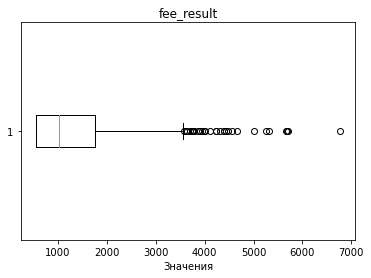

bins =  30


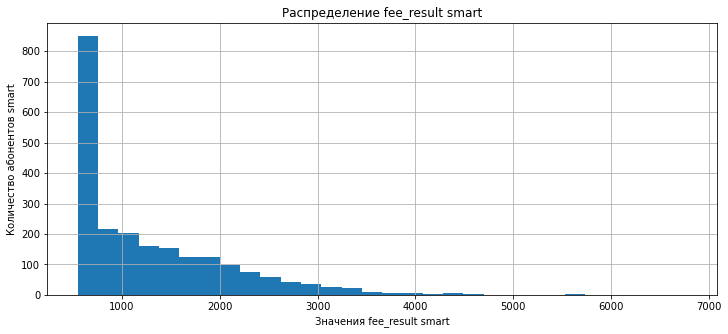

,count,mean,std,min,0.1%,10%,50%,95%,max
gb_round,"2,228.00",16.34,5.74,0.00,1.00,9.00,17.00,25.00,38.00


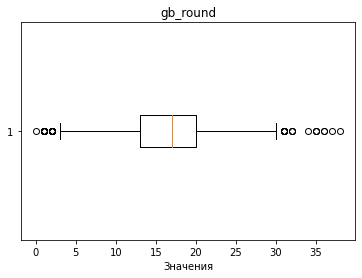

bins =  30


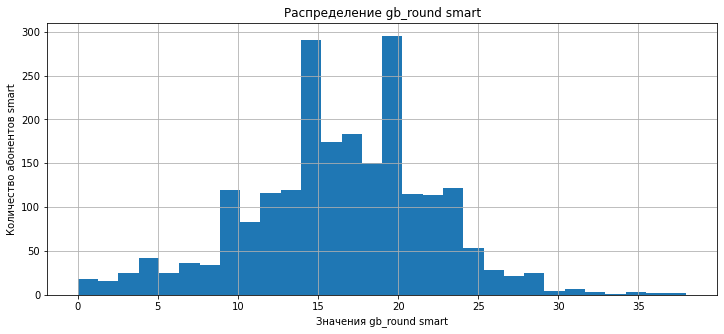

,count,mean,std,min,0.1%,10%,50%,95%,max
duration_round,"2,220.00",419.61,188.87,2.00,3.09,170.90,423.00,727.00,"1,435.00"


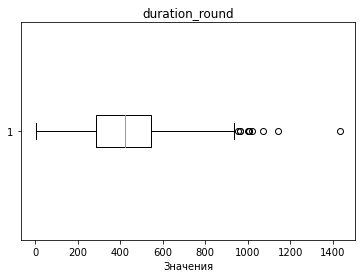

bins =  30


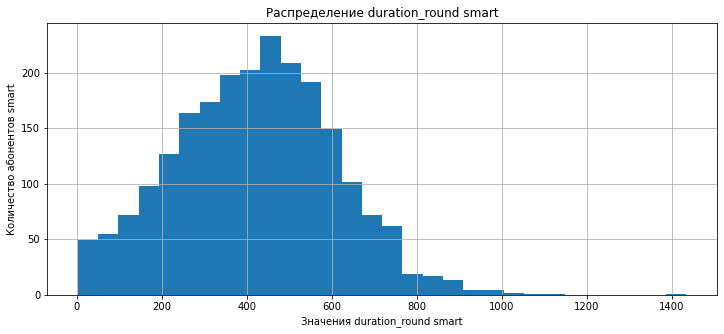

,count,mean,std,min,0.1%,10%,50%,95%,max
call_count,"2,220.00",47.14,20.87,1.00,1.00,19.00,48.00,81.00,162.00


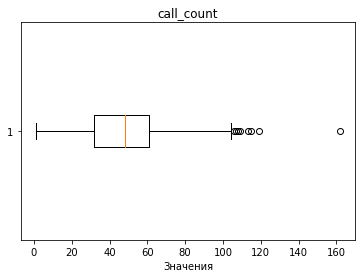

bins =  30


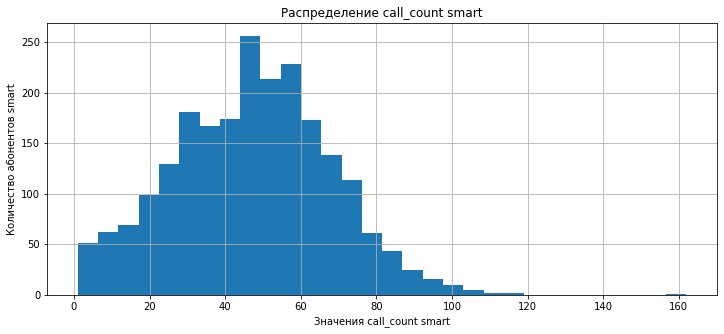

,count,mean,std,min,0.1%,10%,50%,95%,max
message_count,"1,921.00",38.74,26.78,1.00,1.00,8.00,34.00,91.00,143.00


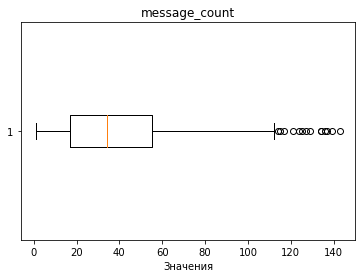

bins =  30


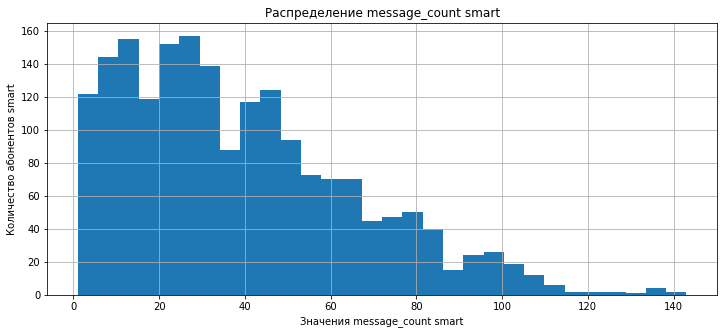

In [73]:
#Нарисуем графики распределения значений по интересующим нас колонкам для тарифа smart 
for col in ['fee_result', 'gb_round', 'duration_round', 'call_count', 'message_count']:
    hist_plot(agg_table.query('tariff == "smart"'),col,'smart')

,count,mean,std,min,0.1%,10%,50%,95%,max
fee_result,975.00,"2,071.38",377.92,"1,950.00","1,950.00","1,950.00","1,950.00","3,000.00","4,800.00"


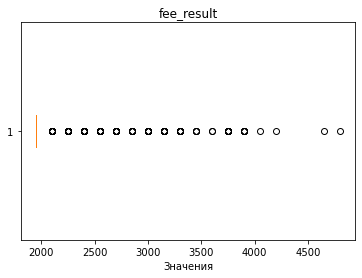

bins =  30


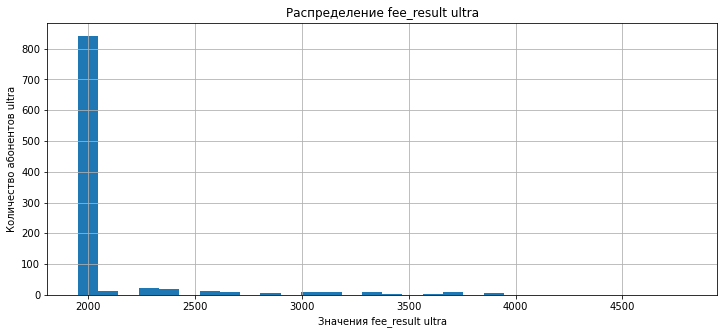

,count,mean,std,min,0.1%,10%,50%,95%,max
gb_round,975.00,19.69,9.70,0.00,0.97,7.00,19.00,37.00,49.00


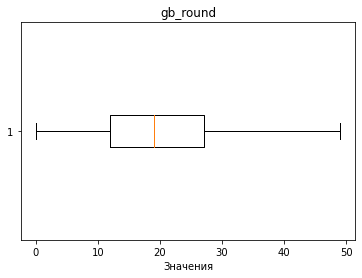

bins =  30


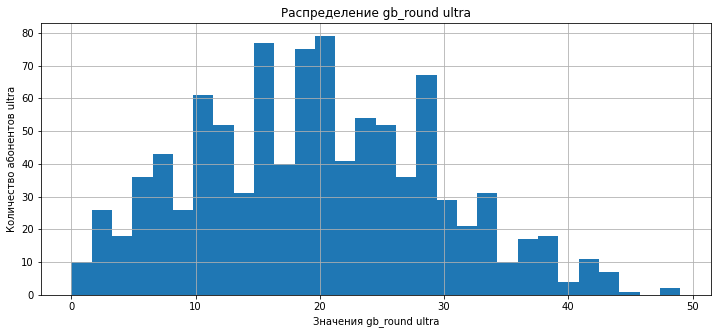

,count,mean,std,min,0.1%,10%,50%,95%,max
duration_round,937.00,551.23,305.16,1.00,1.00,146.20,533.00,"1,097.80","1,673.00"


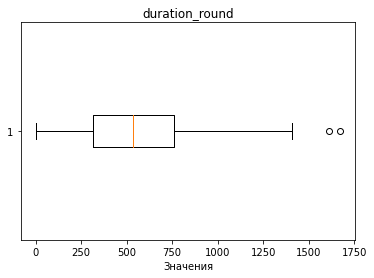

bins =  30


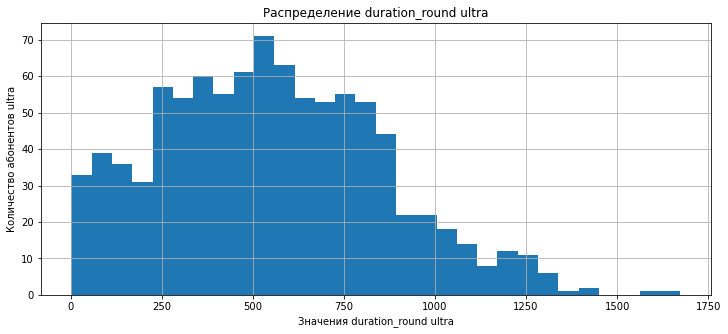

,count,mean,std,min,0.1%,10%,50%,95%,max
call_count,937.00,61.98,34.17,1.00,1.00,17.00,61.00,126.00,190.00


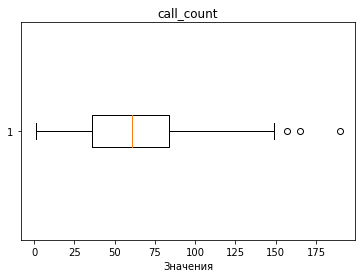

bins =  30


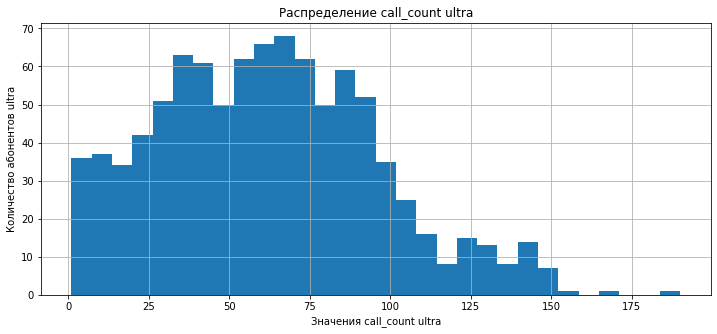

,count,mean,std,min,0.1%,10%,50%,95%,max
message_count,785.00,61.59,46.04,1.00,1.00,10.00,51.00,151.80,224.00


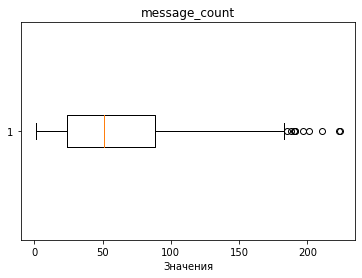

bins =  30


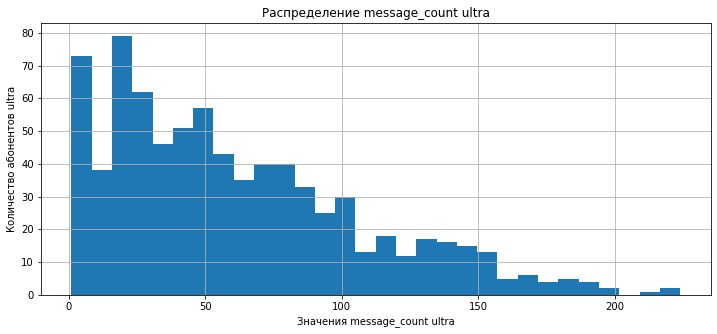

In [74]:
#Нарисуем графики распределения значений по интересующим нас колонкам для тарифа ultra
for col in ['fee_result', 'gb_round', 'duration_round', 'call_count', 'message_count']:
    hist_plot(agg_table.query('tariff == "ultra"'),col, 'ultra')

**Выводы**

В среднем абоненты тарифа smart платят 1000 рублей в месяц. Ежемесячный объём услуг составляет 17 Гб интернет трафика, 400 минут разговоров или 47 звонков в месяц. Также в рамках тарифа абоненты пишут в районе 30 сообщений.

Большинство распределений показателей тарифа smart похожи на нормальные, и только распределение выручки и количества сообщений больше похожи на экспоненциальные.

В среднем абоненты тарифа ультра платят около 2000 рублей в месяц. Ежемесячно используют 19 Гб трафика, 520 минут на разговоры по телефону или совершают около 60 звонков в месяц, также пишут по 40 сообщений в месяц. 

Распределения показателей тарифа ultra похожи на нормальные, но они явно скошены влево. Это может значить, что заметная часть абонентов мало звонят и пишут смс, а в основном используют тариф для интернета.

,count,mean,std,min,0.1%,10%,50%,95%,max
fee_result,"3,203.00","1,528.07",799.09,550.00,550.00,550.00,"1,649.00","2,907.00","6,770.00"


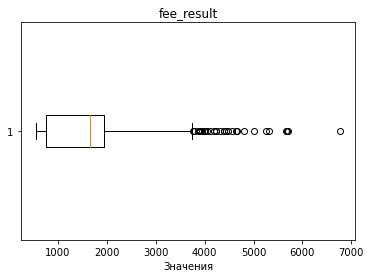

bins =  30


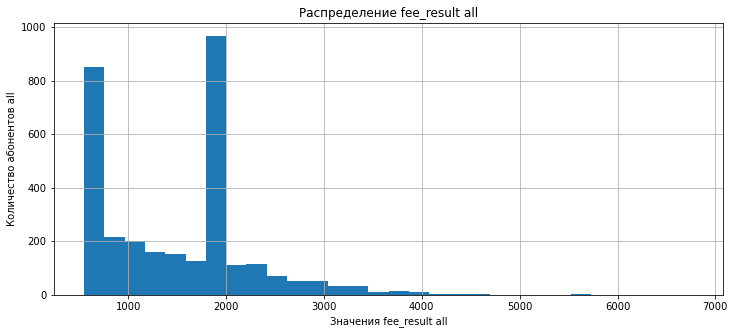

In [75]:
#Нарисуем графики распределения значений по интересующим нас колонкам для тарифа ultra
for col in ['fee_result']:
    hist_plot(agg_table,col, 'all')

### Посмотрим что будет, если избавиться от выбросов

In [76]:
#Создадим копию таблицы
agg_table_2 = agg_table.copy()

#Избавимся от выбросов и посмотрим что вышло
for col in ['fee_result', 'gb_round', 'duration_round', 'call_count', 'message_count']:
    agg_table_2[col] = (agg_table_2[col].loc[(agg_table_2[col] >= agg_table_2[col].quantile(.001))&
                                            (agg_table_2[col] <= agg_table_2[col].quantile(.95))]
                       )
    

In [77]:
#В таблице появились пропуски
agg_table_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 0 to 3202
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           3203 non-null   int64         
 1   month             3203 non-null   datetime64[ns]
 2   gb_round          3049 non-null   float64       
 3   duration_round    2997 non-null   float64       
 4   call_count        3009 non-null   float64       
 5   message_count     2572 non-null   float64       
 6   tariff            3203 non-null   object        
 7   age               3203 non-null   int64         
 8   city              3203 non-null   object        
 9   reg_month         3203 non-null   datetime64[ns]
 10  churn_month       186 non-null    datetime64[ns]
 11  message_inc       3203 non-null   int64         
 12  minutes_inc       3203 non-null   int64         
 13  rub_month_fee     3203 non-null   int64         
 14  rub_per_gb        3203 n

,count,mean,std,min,0.1%,10%,50%,95%,max
fee_result,922.00,"1,991.00",148.21,"1,950.00","1,950.00","1,950.00","1,950.00","2,400.00","2,850.00"


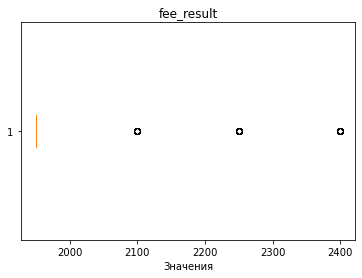

bins =  30


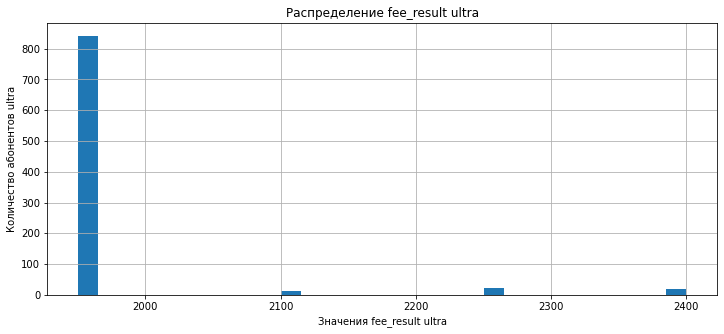

,count,mean,std,min,0.1%,10%,50%,95%,max
gb_round,840.00,17.13,7.60,1.00,1.00,6.00,18.00,29.00,30.00


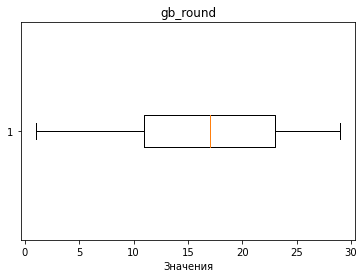

bins =  30


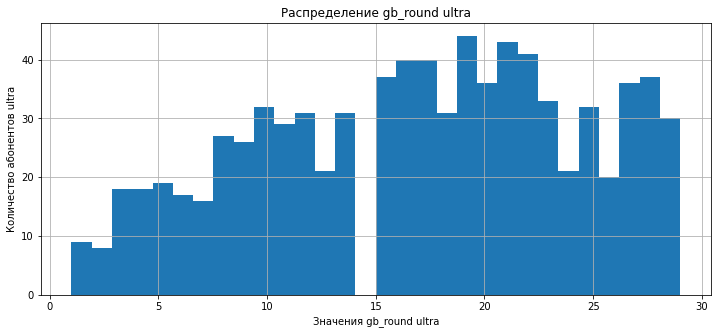

,count,mean,std,min,0.1%,10%,50%,95%,max
duration_round,802.00,468.03,232.01,5.00,5.80,131.30,481.50,823.95,865.00


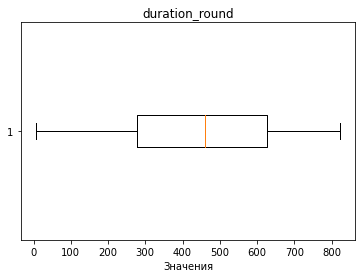

bins =  30


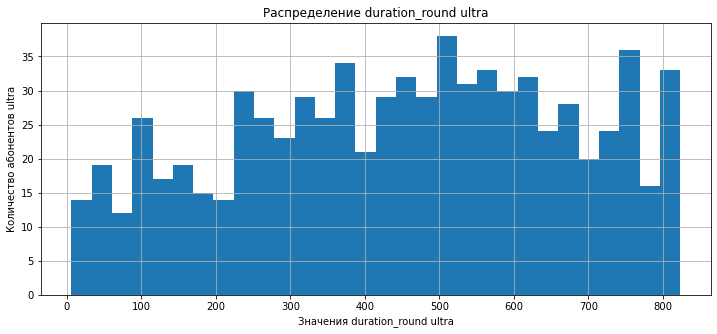

,count,mean,std,min,0.1%,10%,50%,95%,max
call_count,809.00,52.75,26.06,1.00,1.00,14.80,55.00,92.00,97.00


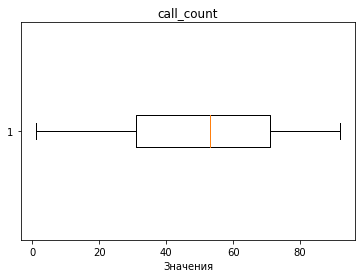

bins =  30


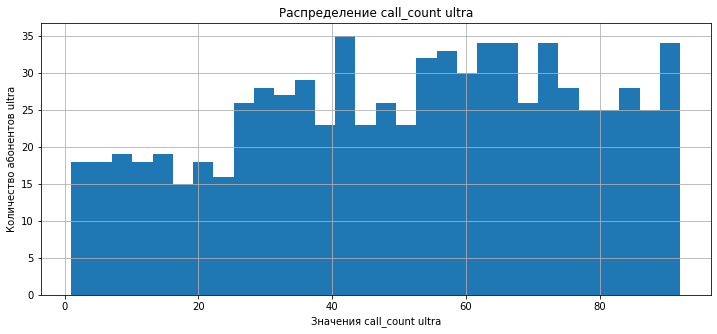

,count,mean,std,min,0.1%,10%,50%,95%,max
message_count,665.00,46.48,30.01,1.00,1.00,7.00,43.00,99.00,112.00


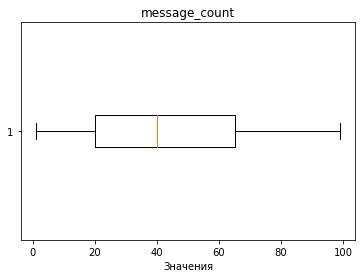

bins =  30


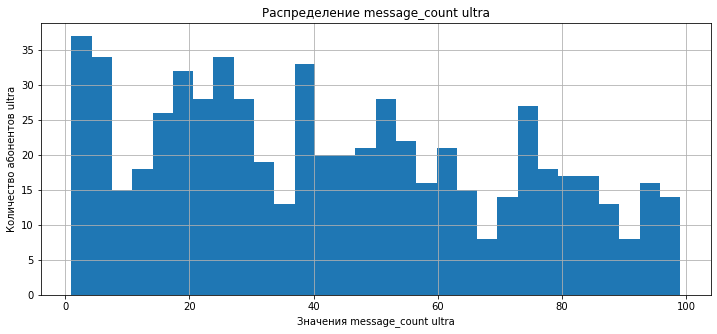

In [78]:
#Нарисуем графики распределения значений по интересующим нас колонкам для тарифа ultra
for col in ['fee_result', 'gb_round', 'duration_round', 'call_count', 'message_count']:
    hist_plot_q(agg_table_2.query('tariff == "ultra"'),col, 'ultra')

,count,mean,std,min,0.1%,10%,50%,95%,max
fee_result,"2,121.00","1,177.69",643.34,550.00,550.00,550.00,959.00,"2,457.00","2,907.00"


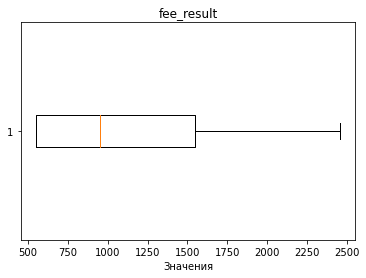

bins =  30


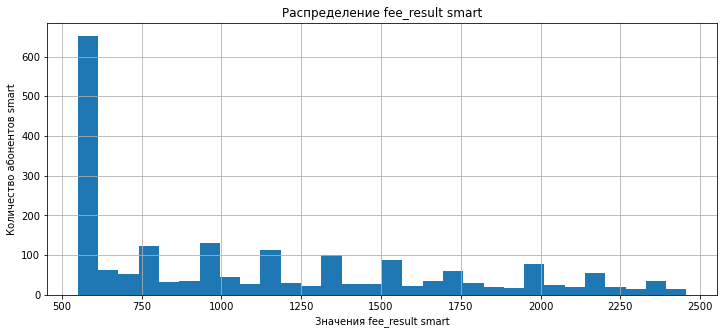

,count,mean,std,min,0.1%,10%,50%,95%,max
gb_round,"2,209.00",16.21,5.54,1.00,1.00,9.00,17.00,25.00,30.00


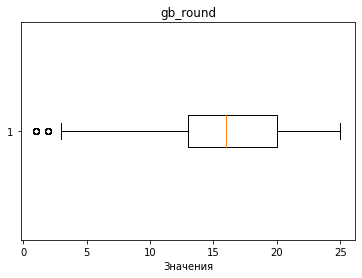

bins =  30


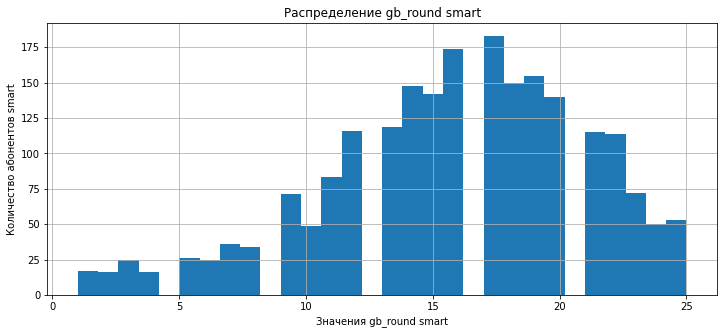

,count,mean,std,min,0.1%,10%,50%,95%,max
duration_round,"2,195.00",413.45,180.42,2.00,2.97,170.00,420.00,710.30,865.00


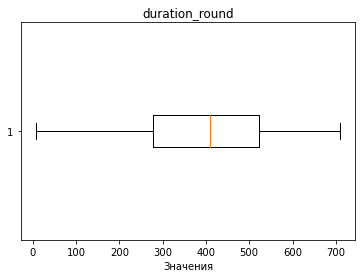

bins =  30


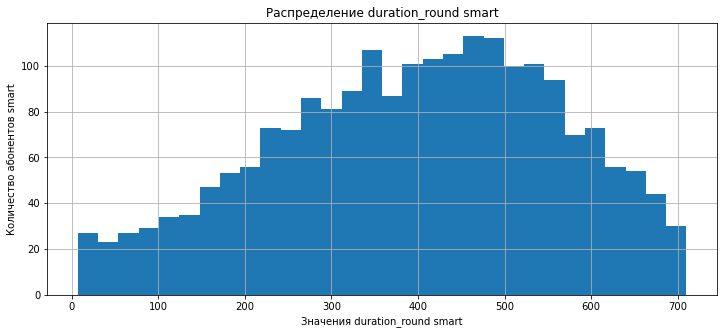

,count,mean,std,min,0.1%,10%,50%,95%,max
call_count,"2,200.00",46.59,20.13,1.00,1.00,19.00,47.00,79.00,97.00


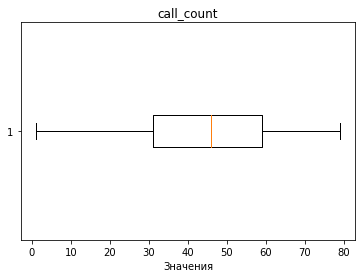

bins =  30


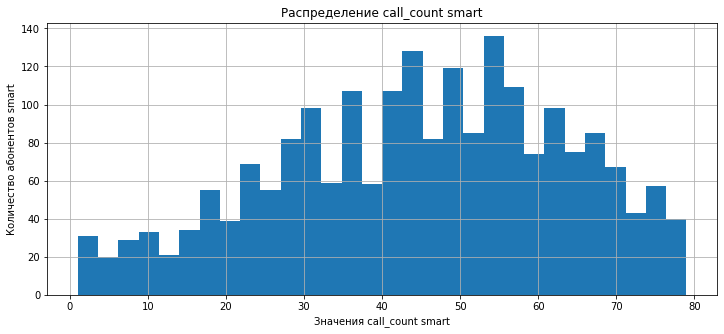

,count,mean,std,min,0.1%,10%,50%,95%,max
message_count,"1,907.00",38.08,25.74,1.00,1.00,8.00,33.00,88.00,112.00


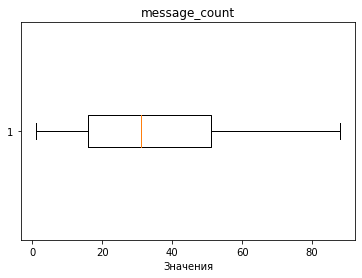

bins =  30


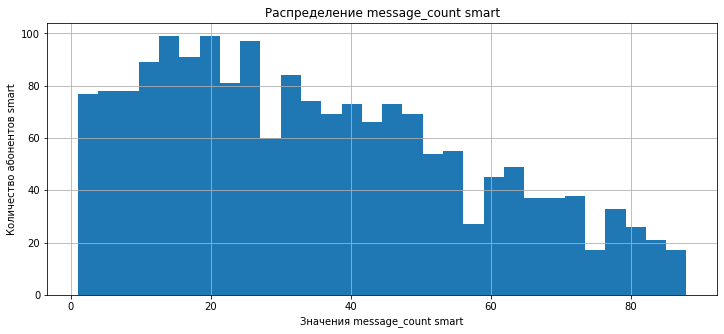

In [79]:
#Нарисуем графики распределения значений по интересующим нас колонкам для тарифа smart
for col in ['fee_result', 'gb_round', 'duration_round', 'call_count', 'message_count']:
    hist_plot_q(agg_table_2.query('tariff == "smart"'),col, 'smart')

**Выводы**

Размах немного сократился, среднее стало ближе к медиане. Но кардинально на результаты это не повлияло. Тем не менее это может повлиять в тесте при проверке гипотезы.

### Посчитаем средние значения для объёмов потребляемых услуг

In [80]:
#Посчитаем среднюю продолжительность звонков на тарифе ultra за каждый месяц
minutes_mean_ultra = agg_table.query('tariff == "ultra"').groupby('month').agg({'duration_round':'mean'})
minutes_mean_ultra.style.background_gradient('coolwarm')

,duration_round
month,
2018-01-01 00:00:00,428.111111
2018-02-01 00:00:00,330.428571
2018-03-01 00:00:00,489.648649
2018-04-01 00:00:00,475.301887
2018-05-01 00:00:00,539.238095
2018-06-01 00:00:00,500.812500
2018-07-01 00:00:00,574.581395
2018-08-01 00:00:00,538.613861
2018-09-01 00:00:00,567.091743


In [81]:
#Посчитаем среднюю продолжительность звонков на тарифе smart за каждый месяц
minutes_mean_smart = agg_table.query('tariff == "smart"').groupby('month').agg({'duration_round':'mean'})
minutes_mean_smart.style.background_gradient('coolwarm')

,duration_round
month,
2018-01-01 00:00:00,210.030303
2018-02-01 00:00:00,298.689655
2018-03-01 00:00:00,390.051948
2018-04-01 00:00:00,370.441441
2018-05-01 00:00:00,387.361702
2018-06-01 00:00:00,398.067485
2018-07-01 00:00:00,408.353234
2018-08-01 00:00:00,424.871245
2018-09-01 00:00:00,430.266409


In [82]:
#Посчитаем среднее количество сообщений на тарифе ultra за каждый месяц
messages_mean_ultra = agg_table.query('tariff == "ultra"').groupby('month').agg({'message_count':'mean'})
messages_mean_ultra.style.background_gradient('coolwarm')

,message_count
month,
2018-01-01 00:00:00,43.428571
2018-02-01 00:00:00,37.285714
2018-03-01 00:00:00,47.800000
2018-04-01 00:00:00,44.512821
2018-05-01 00:00:00,49.313725
2018-06-01 00:00:00,52.530303
2018-07-01 00:00:00,62.486111
2018-08-01 00:00:00,59.103448
2018-09-01 00:00:00,63.627660


In [83]:
#Посчитаем среднее количество сообщений на тарифе smart за каждый месяц
messages_mean_smart = agg_table.query('tariff == "smart"').groupby('month').agg({'message_count':'mean'})
messages_mean_smart.style.background_gradient('coolwarm')

,message_count
month,
2018-01-01 00:00:00,20.000000
2018-02-01 00:00:00,27.940000
2018-03-01 00:00:00,35.550725
2018-04-01 00:00:00,35.864583
2018-05-01 00:00:00,39.032787
2018-06-01 00:00:00,38.577465
2018-07-01 00:00:00,38.988506
2018-08-01 00:00:00,38.935961
2018-09-01 00:00:00,39.219731


In [84]:
#Посчитаем средний объём трафика на тарифе ultra за каждый месяц
inet_mean_ultra = agg_table.query('tariff == "ultra"').groupby('month').agg({'gb_round':'mean'})
inet_mean_ultra.style.background_gradient('coolwarm')

,gb_round
month,
2018-01-01 00:00:00,13.222222
2018-02-01 00:00:00,13.090909
2018-03-01 00:00:00,17.648649
2018-04-01 00:00:00,16.963636
2018-05-01 00:00:00,19.666667
2018-06-01 00:00:00,19.168675
2018-07-01 00:00:00,20.733333
2018-08-01 00:00:00,19.783019
2018-09-01 00:00:00,19.412281


In [85]:
#Посчитаем среднее количество трафика на тарифе smart за каждый месяц
inet_mean_smart = agg_table.query('tariff == "smart"').groupby('month').agg({'gb_round':'mean'})
inet_mean_smart.style.background_gradient('coolwarm')

,gb_round
month,
2018-01-01 00:00:00,8.735294
2018-02-01 00:00:00,11.844828
2018-03-01 00:00:00,15.233766
2018-04-01 00:00:00,13.625000
2018-05-01 00:00:00,15.907801
2018-06-01 00:00:00,15.951220
2018-07-01 00:00:00,15.875622
2018-08-01 00:00:00,16.807692
2018-09-01 00:00:00,16.392308


In [86]:
#Посчитаем среднюю выручку на тарифе smart за каждый месяц
fee_mean_smart = agg_table.query('tariff == "smart"').groupby('month').agg({'fee_result':'mean'})
fee_mean_smart.style.background_gradient('coolwarm')

,fee_result
month,
2018-01-01 00:00:00,721.323529
2018-02-01 00:00:00,827.603448
2018-03-01 00:00:00,1164.623377
2018-04-01 00:00:00,963.089286
2018-05-01 00:00:00,1197.510638
2018-06-01 00:00:00,1204.018293
2018-07-01 00:00:00,1223.950249
2018-08-01 00:00:00,1323.888889
2018-09-01 00:00:00,1249.946154


In [87]:
#Посчитаем среднюю выручку на тарифе ultra за каждый месяц
fee_mean_ultra = agg_table.query('tariff == "ultra"').groupby('month').agg({'fee_result':'mean'})
fee_mean_ultra.style.background_gradient('coolwarm')

,fee_result
month,
2018-01-01 00:00:00,1950.000000
2018-02-01 00:00:00,1977.272727
2018-03-01 00:00:00,2014.864865
2018-04-01 00:00:00,2001.818182
2018-05-01 00:00:00,2061.363636
2018-06-01 00:00:00,2040.361446
2018-07-01 00:00:00,2120.000000
2018-08-01 00:00:00,2084.433962
2018-09-01 00:00:00,2025.000000


In [88]:
#Посчитаем среднюю выручку для абонентов Москвы за каждый месяц
fee_moscow = agg_table.query('city == "Москва"').groupby('month').agg({'fee_result':'mean'})
fee_moscow.style.background_gradient('coolwarm')

,fee_result
month,
2018-01-01 00:00:00,1475.000000
2018-02-01 00:00:00,1175.142857
2018-03-01 00:00:00,1649.600000
2018-04-01 00:00:00,1503.310345
2018-05-01 00:00:00,1465.128205
2018-06-01 00:00:00,1500.723404
2018-07-01 00:00:00,1448.571429
2018-08-01 00:00:00,1600.709677
2018-09-01 00:00:00,1548.544118


In [89]:
#Посчитаем среднюю выручку для абонентов из других городов за каждый месяц
fee_other = agg_table.query('city != "Москва"').groupby('month').agg({'fee_result':'mean'})
fee_other.style.background_gradient('coolwarm')

,fee_result
month,
2018-01-01 00:00:00,865.000000
2018-02-01 00:00:00,1137.106061
2018-03-01 00:00:00,1396.106383
2018-04-01 00:00:00,1263.550725
2018-05-01 00:00:00,1474.755952
2018-06-01 00:00:00,1481.375000
2018-07-01 00:00:00,1513.591489
2018-08-01 00:00:00,1552.143885
2018-09-01 00:00:00,1472.336601


Посчитаем то же самое, только без выбросов, используя почищенный agg_table_2

In [90]:
#Посчитаем среднюю выручку без выбросов для абонентов тарифа smart за каждый месяц
fee_mean_smart2 = agg_table_2.query('tariff == "smart"').groupby('month').agg({'fee_result':'mean'})
fee_mean_smart2.style.background_gradient('coolwarm')

,fee_result
month,
2018-01-01 00:00:00,721.323529
2018-02-01 00:00:00,781.912281
2018-03-01 00:00:00,1164.623377
2018-04-01 00:00:00,945.189189
2018-05-01 00:00:00,1136.167883
2018-06-01 00:00:00,1156.354037
2018-07-01 00:00:00,1133.010417
2018-08-01 00:00:00,1227.986607
2018-09-01 00:00:00,1168.184739


In [91]:
#Посчитаем среднюю выручку без выбросов для абонентов тарифа ultra за каждый месяц
fee_mean_ultra2 = agg_table_2.query('tariff == "ultra"').groupby('month').agg({'fee_result':'mean'})
fee_mean_ultra2.style.background_gradient('coolwarm')

,fee_result
month,
2018-01-01 00:00:00,1950.000000
2018-02-01 00:00:00,1977.272727
2018-03-01 00:00:00,1987.500000
2018-04-01 00:00:00,1983.333333
2018-05-01 00:00:00,1978.571429
2018-06-01 00:00:00,1974.683544
2018-07-01 00:00:00,1983.333333
2018-08-01 00:00:00,2009.405941
2018-09-01 00:00:00,1991.891892


In [92]:
#Посчитаем среднюю выручку без выбросов для абонентов из Москвы за каждый месяц
fee_moscow2 = agg_table_2.query('city == "Москва"').groupby('month').agg({'fee_result':'mean'})
fee_moscow2.style.background_gradient('coolwarm')

,fee_result
month,
2018-01-01 00:00:00,1475.000000
2018-02-01 00:00:00,1175.142857
2018-03-01 00:00:00,1578.526316
2018-04-01 00:00:00,1451.642857
2018-05-01 00:00:00,1351.756757
2018-06-01 00:00:00,1461.608696
2018-07-01 00:00:00,1392.037037
2018-08-01 00:00:00,1579.147541
2018-09-01 00:00:00,1478.123077


In [93]:
#Посчитаем среднюю выручку без выбросов для абонентов из других городов за каждый месяц
fee_other2 = agg_table_2.query('city != "Москва"').groupby('month').agg({'fee_result':'mean'})
fee_other2.style.background_gradient('coolwarm')

,fee_result
month,
2018-01-01 00:00:00,865.000000
2018-02-01 00:00:00,1101.800000
2018-03-01 00:00:00,1396.106383
2018-04-01 00:00:00,1250.875912
2018-05-01 00:00:00,1412.822086
2018-06-01 00:00:00,1417.211340
2018-07-01 00:00:00,1383.643836
2018-08-01 00:00:00,1445.799242
2018-09-01 00:00:00,1409.830508


In [94]:
#Посчитаем среднее количество сообщений без выбросов на тарифе ultra за каждый месяц
messages_mean_ultra2 = agg_table_2.query('tariff == "ultra"').groupby('month').agg({'message_count':'mean'})
messages_mean_ultra2.style.background_gradient('coolwarm')

,message_count
month,
2018-01-01 00:00:00,43.428571
2018-02-01 00:00:00,37.285714
2018-03-01 00:00:00,35.090909
2018-04-01 00:00:00,39.540541
2018-05-01 00:00:00,39.956522
2018-06-01 00:00:00,39.689655
2018-07-01 00:00:00,46.868852
2018-08-01 00:00:00,44.797297
2018-09-01 00:00:00,49.215190


In [95]:
#Посчитаем среднюю продолжительность звонков без выбросов на тарифе smart за каждый месяц
minutes_mean_smart2 = agg_table_2.query('tariff == "smart"').groupby('month').agg({'duration_round':'mean'})
minutes_mean_smart2.style.background_gradient('coolwarm')

,duration_round
month,
2018-01-01 00:00:00,210.030303
2018-02-01 00:00:00,298.689655
2018-03-01 00:00:00,390.051948
2018-04-01 00:00:00,370.441441
2018-05-01 00:00:00,387.361702
2018-06-01 00:00:00,395.123457
2018-07-01 00:00:00,408.353234
2018-08-01 00:00:00,422.392241
2018-09-01 00:00:00,430.266409


In [96]:
#Посчитаем среднее количество сообщений без выбросов на тарифе smart за каждый месяц
messages_mean_smart2 = agg_table_2.query('tariff == "smart"').groupby('month').agg({'message_count':'mean'})
messages_mean_smart2.style.background_gradient('coolwarm')

,message_count
month,
2018-01-01 00:00:00,20.000000
2018-02-01 00:00:00,27.940000
2018-03-01 00:00:00,35.550725
2018-04-01 00:00:00,35.864583
2018-05-01 00:00:00,39.032787
2018-06-01 00:00:00,37.335714
2018-07-01 00:00:00,38.421965
2018-08-01 00:00:00,38.465347
2018-09-01 00:00:00,38.443439


In [97]:
#Посчитаем среднее количество сообщений без выбросов на тарифе ultra за каждый месяц
messages_mean_ultra2 = agg_table_2.query('tariff == "ultra"').groupby('month').agg({'message_count':'mean'})
messages_mean_ultra2.style.background_gradient('coolwarm')

,message_count
month,
2018-01-01 00:00:00,43.428571
2018-02-01 00:00:00,37.285714
2018-03-01 00:00:00,35.090909
2018-04-01 00:00:00,39.540541
2018-05-01 00:00:00,39.956522
2018-06-01 00:00:00,39.689655
2018-07-01 00:00:00,46.868852
2018-08-01 00:00:00,44.797297
2018-09-01 00:00:00,49.215190


In [98]:
#Посчитаем средний объём трафика без выбросов на тарифе ultra за каждый месяц
inet_mean_ultra2 = agg_table.query('tariff == "ultra"').groupby('month').agg({'gb_round':'mean'})
inet_mean_ultra2.style.background_gradient('coolwarm')

,gb_round
month,
2018-01-01 00:00:00,13.222222
2018-02-01 00:00:00,13.090909
2018-03-01 00:00:00,17.648649
2018-04-01 00:00:00,16.963636
2018-05-01 00:00:00,19.666667
2018-06-01 00:00:00,19.168675
2018-07-01 00:00:00,20.733333
2018-08-01 00:00:00,19.783019
2018-09-01 00:00:00,19.412281


In [99]:
#Посчитаем средний объём трафика без выбросов на тарифе smart за каждый месяц
inet_mean_smart2 = agg_table.query('tariff == "smart"').groupby('month').agg({'gb_round':'mean'})
inet_mean_smart2.style.background_gradient('coolwarm')

,gb_round
month,
2018-01-01 00:00:00,8.735294
2018-02-01 00:00:00,11.844828
2018-03-01 00:00:00,15.233766
2018-04-01 00:00:00,13.625000
2018-05-01 00:00:00,15.907801
2018-06-01 00:00:00,15.951220
2018-07-01 00:00:00,15.875622
2018-08-01 00:00:00,16.807692
2018-09-01 00:00:00,16.392308


**Выводы**

Интересно заметить, что объём потребляемых услуг на обоих тарифах постепенно растёт с начала года и достигает пика в декабре. Причём это не списать на выбросы. Абоненты похоже легко привыкают к хорошей жизни с большим количеством трафика, минут и сообщений.

In [100]:
#Чтобы работали функции расчёта дисперсии, удалим пропуски в колонке с выручкой из второй таблицы
agg_table_2.dropna(subset = ['fee_result'],inplace = True)

In [101]:
#Проверим
agg_table_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3043 entries, 0 to 3202
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           3043 non-null   int64         
 1   month             3043 non-null   datetime64[ns]
 2   gb_round          2960 non-null   float64       
 3   duration_round    2861 non-null   float64       
 4   call_count        2872 non-null   float64       
 5   message_count     2464 non-null   float64       
 6   tariff            3043 non-null   object        
 7   age               3043 non-null   int64         
 8   city              3043 non-null   object        
 9   reg_month         3043 non-null   datetime64[ns]
 10  churn_month       175 non-null    datetime64[ns]
 11  message_inc       3043 non-null   int64         
 12  minutes_inc       3043 non-null   int64         
 13  rub_month_fee     3043 non-null   int64         
 14  rub_per_gb        3043 n

In [102]:
#Посмотрим на распределение в исходной таблице 
agg_table[['fee_result']].describe([.001,.1,.95]).T

,count,mean,std,min,0.1%,10%,50%,95%,max
fee_result,"3,203.00","1,528.07",799.09,550.00,550.00,550.00,"1,649.00","2,907.00","6,770.00"


In [103]:
#Посмотрим на распределение в таблице без выбросов в колонке выручки
agg_table_2[['fee_result']].describe([.001,.1,.95]).T

,count,mean,std,min,0.1%,10%,50%,95%,max
fee_result,"3,043.00","1,424.12",659.42,550.00,550.00,550.00,"1,550.00","2,400.00","2,907.00"


Для расчёта дисперсии используем функцию variance

In [104]:
moscow_var = stat.variance(fee_moscow["fee_result"])
moscow_var2 = stat.variance(fee_moscow2["fee_result"])
other_var = stat.variance(fee_other["fee_result"])
other_var2 = stat.variance(fee_other2["fee_result"])
ultra_var = stat.variance(agg_table.query('tariff == "ultra"')['fee_result'])
ultra_var2 = stat.variance(agg_table_2.query('tariff == "ultra"')['fee_result'])
smart_var = stat.variance(agg_table.query('tariff == "smart"')['fee_result'])
smart_var2 = stat.variance(agg_table_2.query('tariff == "smart"')['fee_result'])

print(f'Дисперсия помесячной выручки для абонентов Москвы: {moscow_var}')
print(20*'-')
print(f'Дисперсия помесячной выручки для абонентов Москвы без выбросов: {moscow_var2}')
print(20*'-')
print(f'Дисперсия помесячной выручки для абонентов из других городов: {other_var}')
print(20*'-')
print(f'Дисперсия помесячной выручки для абонентов из других городов без выбросов: {other_var2}')
print(20*'-')
print(f'Дисперсия помесячной выручки для абонентов тарифа ultra: {ultra_var}')
print(20*'-')
print(f'Дисперсия помесячной выручки для абонентов тарифа ultra без выбросов: {ultra_var2}')
print(20*'-')
print(f'Дисперсия помесячной выручки для абонентов тарифа smart: {smart_var}')
print(20*'-')
print(f'Дисперсия помесячной выручки для абонентов тарифа smart без выбросов: {smart_var2}')

Дисперсия помесячной выручки для абонентов Москвы: 15727.836358765015
--------------------
Дисперсия помесячной выручки для абонентов Москвы без выбросов: 11400.56105031365
--------------------
Дисперсия помесячной выручки для абонентов из других городов: 55729.600664386795
--------------------
Дисперсия помесячной выручки для абонентов из других городов без выбросов: 35334.900164269515
--------------------
Дисперсия помесячной выручки для абонентов тарифа ultra: 142819.9494550624
--------------------
Дисперсия помесячной выручки для абонентов тарифа ultra без выбросов: 21965.561341652123
--------------------
Дисперсия помесячной выручки для абонентов тарифа smart: 669840.480848111
--------------------
Дисперсия помесячной выручки для абонентов тарифа smart без выбросов: 413888.3843403343


Для расчёта стандартного отклонения возьмём корень квадратный из дисперсии

In [105]:
moscow_std = math.sqrt(moscow_var)
moscow_std2 = math.sqrt(moscow_var2)
other_std = math.sqrt(other_var)
other_std2 = math.sqrt(other_var2)
ultra_std = math.sqrt(ultra_var)
ultra_std2 = math.sqrt(ultra_var2)
smart_std = math.sqrt(smart_var)
smart_std2 = math.sqrt(smart_var2)

print(f'Стандартное отклонение помесячной выручки для абонентов Москвы: {moscow_std}')
print(20*'-')
print(f'Стандартное отклонение помесячной выручки для абонентов Москвы без выбросов:{moscow_std2}')
print(20*'-')
print(f'Стандартное отклонение помесячной выручки для абонентов из других городов: {other_std}')
print(20*'-')
print(f'Стандартное отклонение помесячной выручки для абонентов из других городов без выбросов:{other_std2}')
print(20*'-')
print(f'Стандартное отклонение помесячной выручки для абонентов тарифа ultra: {ultra_std}')
print(20*'-')
print(f'Стандартное отклонение помесячной выручки для абонентов тарифа ultra без выбросов: {ultra_std2}')
print(20*'-')
print(f'Стандартное отклонение помесячной выручки для абонентов тарифа smart: {smart_std}')
print(20*'-')
print(f'Стандартное отклонение помесячной выручки для абонентов тарифа smart без выбросов: {smart_std2}')

Стандартное отклонение помесячной выручки для абонентов Москвы: 125.41067083292799
--------------------
Стандартное отклонение помесячной выручки для абонентов Москвы без выбросов:106.77340984680433
--------------------
Стандартное отклонение помесячной выручки для абонентов из других городов: 236.07117711484136
--------------------
Стандартное отклонение помесячной выручки для абонентов из других городов без выбросов:187.975796751256
--------------------
Стандартное отклонение помесячной выручки для абонентов тарифа ultra: 377.9152675601535
--------------------
Стандартное отклонение помесячной выручки для абонентов тарифа ultra без выбросов: 148.20783158002186
--------------------
Стандартное отклонение помесячной выручки для абонентов тарифа smart: 818.4378295558624
--------------------
Стандартное отклонение помесячной выручки для абонентов тарифа smart без выбросов: 643.3415767229212


In [106]:
print('Средняя выручка для абонентов тарифа ultra:',agg_table.query('tariff == "ultra"')['fee_result'].mean())

Средняя выручка для абонентов тарифа ultra: 2071.3846153846152


In [107]:
print('Средняя выручка для абонентов тарифа smart:',agg_table.query('tariff == "smart"')['fee_result'].mean())

Средняя выручка для абонентов тарифа smart: 1290.3056552962298


**Выводы**

Дисперсия и стандартное отклонение в данном случае нам говорят, что разброс выручки для абонентов из Москвы меньше, чем разброс выручки абонентов из других городов. Какие-то определённые выводы делать на этом основании сложно, кроме географических, тем более дальше будет видно, что несмотря на это средние выручки у них не различаются. Разницу в разбросе и среднем отклонении двух тарифов можно обьяснить тем, что абоненты тарифа Ультра привыкли тратить заранее оговоренную сумму и редко превышают свой лимит. А вот абоненты тарифа Смарт очень вариативны в своих тратах и часто выходят за пределы тарифа.

--------------------

### Проверим гипотезу - "средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"



Сформулируем её так:

1) Нулевая гипотеза H0 - Средняя выручка тарифов «Ультра» и «Смарт» не различаются

2) Альтернативная гипотеза H1 - Средняя выручка тарифов «Ультра» и «Смарт» различаются

Используем для проверки гипотезу о равенстве средних двух генеральных совокупностей. Для этого используем t-тест и  метод scipy.stats.ttest_ind (array1, array2,equal_var). 
Дисперсии выборок не равны, поэтому параметр "equal_var" укажем равным "False". К тому же сами выборки не равны, поэтому дисперсии лучше считать по отдельности.

Пороговое значение alpha зададим 5%, для данного теста этой чувствительности вполне достаточно. (Хотя, я проверял и при alpha 1%, и результаты в данном случае не поменялись)

Проверим гипотезу на выборках без выбросов

In [108]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    agg_table_2.query('tariff == "smart"')['fee_result'], 
    agg_table_2.query('tariff == "ultra"')['fee_result'],equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.0
Отвергаем нулевую гипотезу


А что будет, если оставить выбросы?

In [109]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    agg_table.query('tariff == "smart"')['fee_result'], 
    agg_table.query('tariff == "ultra"')['fee_result'],equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  5.22403940028982e-249
Отвергаем нулевую гипотезу


**Выводы**

На глаз средние выручки двух тарифных планов значительно отличаются. t-тест подтвердил гипотезу о различиях в выручке.

-------------------------------------------------------------------

### Проверим гипотезу - "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов."



Сформулируем её так:

1) Нулевая гипотеза H0 - Средняя выручка пользователей из Москвы и пользователей из других регионов не различаются

2) Альтернативная гипотеза H1 - Средняя выручка пользователей из Москвы и пользователей из других регионов различаются

Аналогично применим метод scipy.stats.ttest_ind (array1, array2,equal_var), указав различие дисперсий.

Проверим гипотезу на выборках без выбросов

In [110]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    fee_other2, 
    fee_moscow2,equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  [0.14497661]
Не получилось отвергнуть нулевую гипотезу


Проверим метод на данных с выбросами:

In [111]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    fee_other, 
    fee_moscow,equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  [0.26130692]
Не получилось отвергнуть нулевую гипотезу


**Выводы**

Гипотеза о том, что средние выручки абонентов из Москвы и других регионов не различаются подтверждена с помощью t-теста, хотя это можно в целом увидеть и из агрегированных таблиц помесячных трат. 

---------------------------------------------

### Общие выводы

Мы проанализировали поведение абонентов двух тарифных планов оператора "Мегалайн". 
Цены на тарифные планы отличаются почти в 4 раза. И хотя в среднем абоненты тарифа «Ультра» звонят чаще и дольше, потребление интернет трафика абонентами и количество сообщений в двух тарифах отличаются отнюдь не в 4 раза, а более-менее сопоставимы. 

Тем не менее, из-за различия включённых в пакет объёмов услуг, абоненты тарифа «Смарт» при  постоянно увеличивающемся  уровне потребления регулярно переплачивают в 2 (а бывает и в 3) раза больше базовой платы и приближаются по выручке к значительно более дорогому тарифу «Ультра».

И хотя поведение абонентов по наращиванию объёмов потребления услуг в двух тарифах сходно, за счёт большого объёма пакетных гигабайт, минут и сообщений, абоненты «Ультра» почти не выходят за пределы своего тарифа и каждый месяц выручка, несмотря на увеличение нагрузки на сеть, остаётся примерно на том же уровне. 

Гипотеза о различии средней выручки пользователей тарифов «Ультра» и «Смарт» подтвердилась.

Гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей их других регионов не подтвердилась, все тратят на мобильную связь примерно одинаково.

Исходя из данных можно сказать, что оператору выгодней тариф «Смарт» поскольку абонентов, подписанных на него значительно больше абонентов тарифа «Ультра». И с постоянным увеличением объёмов потребляемых услуг, абоненты тарифа «Смарт» переплачивают за базовый тариф в среднем в 2 раза. Абоненты «Ультра» при сравнимых объёмах не выходят за пределы тарифа.